___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Кластеризация К-Средних - K-Means Clustering


Рассмотрим кластеризацию данных - это пример обучения без учителя (unsupervised learning).

## Цель:

Работая с методами обучения без учителя (unsupervised learning), очень важно уделить время на постановку задачи. В нашем примере мы постараемся объединить в кластеры клиентов некоторого банка, для маркетинговых целей. Такое объединение в кластеры **очень сильно** зависит от предметной области, в нашем случае это маркетинг в банковской сфере.

----

## Данные

Источник: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   Детали можно почитать здесь: [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Ссылки: [pdf] http://hdl.handle.net/1822/14838
              [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     

    # Данные о клиентах банка:
    1 - age - возраст(numeric)
    2 - job : категория работы (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : семейный статус (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education - образование (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: были ли просрочки по кредиту? (categorical: 'no','yes','unknown')
    6 - housing: есть ли кредит на жильё? (categorical: 'no','yes','unknown')
    7 - loan: есть ли потребительский кредит? (categorical: 'no','yes','unknown')
    # информация о последней коммуникации банка с клиентом в текущей маркетинговой кампании:
    8 - contact: тип коммуникации (categorical: 'cellular','telephone')
    9 - month: месяц года, когда была последняя коммуникация (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: день недели, когда была последняя коммуникация (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: длительность последней коммуникации, в секундах (numeric). Важное замечание: этот атрибут очень сильно влияет на целевую переменную (например, если duration=0, то y='no'). Однако, эта длительность неизвестна до момента совершения телефонного звонка. А после звонка значение y уже становится явно известным. Поэтому данный атрибут следует рассматривать только для анализа данных, и его следует исключить из рассмотрения, когда мы создаём предиктивную модель.
    # другие атрибуты:
    12 - campaign: сколько раз банк контактировал с клиентом во время текущей маркетинговой кампании, включая последнюю коммуникацию (numeric)
    13 - pdays: количество дней, прошедшее с момента последней коммуникации с клиентом во время предыдущей маркетинговой кампании (numeric; 999 означает, что предыдущих коммуникаций не было)
    14 - previous: сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)
    15 - poutcome: результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')
    # социальные и экономические атрибуты
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Исследование данных (EDA - Exploratory Data Analysis)

In [167]:
df = pd.read_csv("../DATA/bank-full.csv")

In [168]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [169]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Анализ непрерывных признаков

<AxesSubplot:xlabel='age', ylabel='Count'>

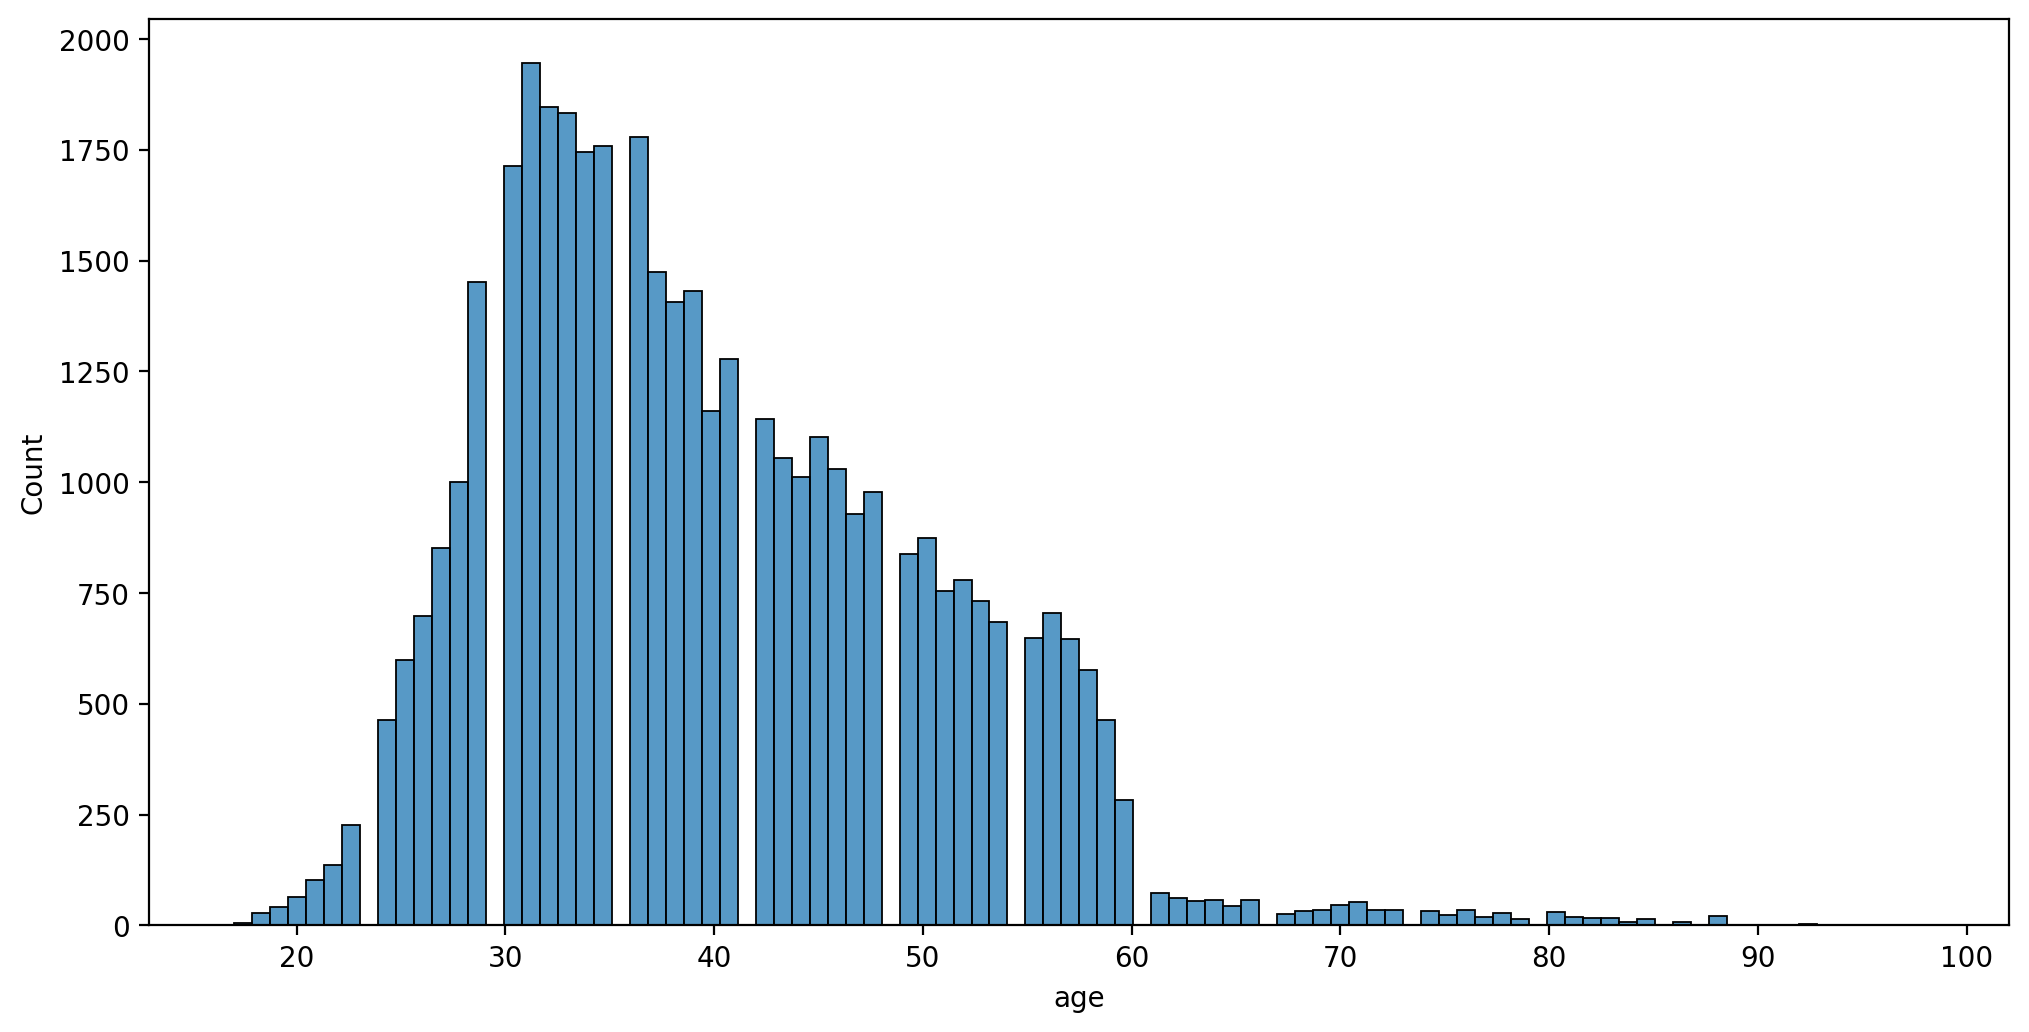

In [171]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

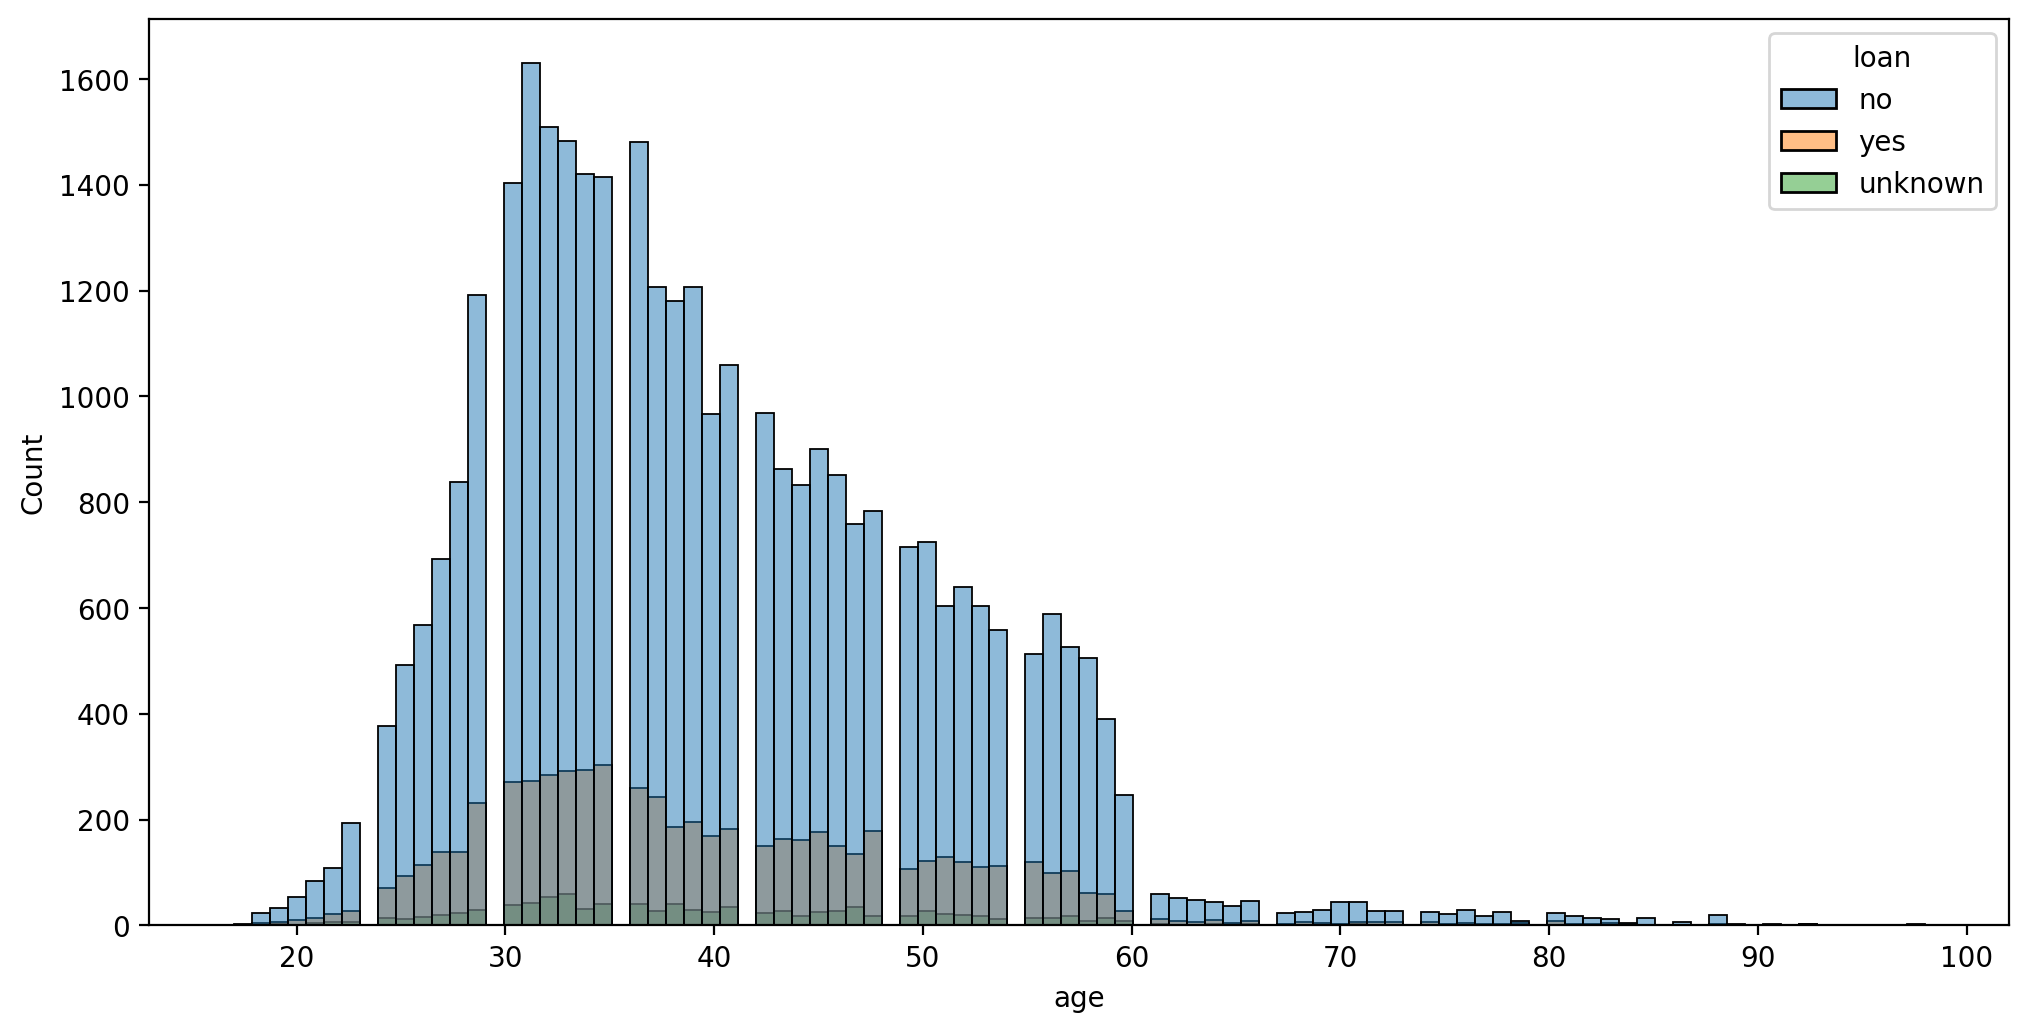

In [172]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

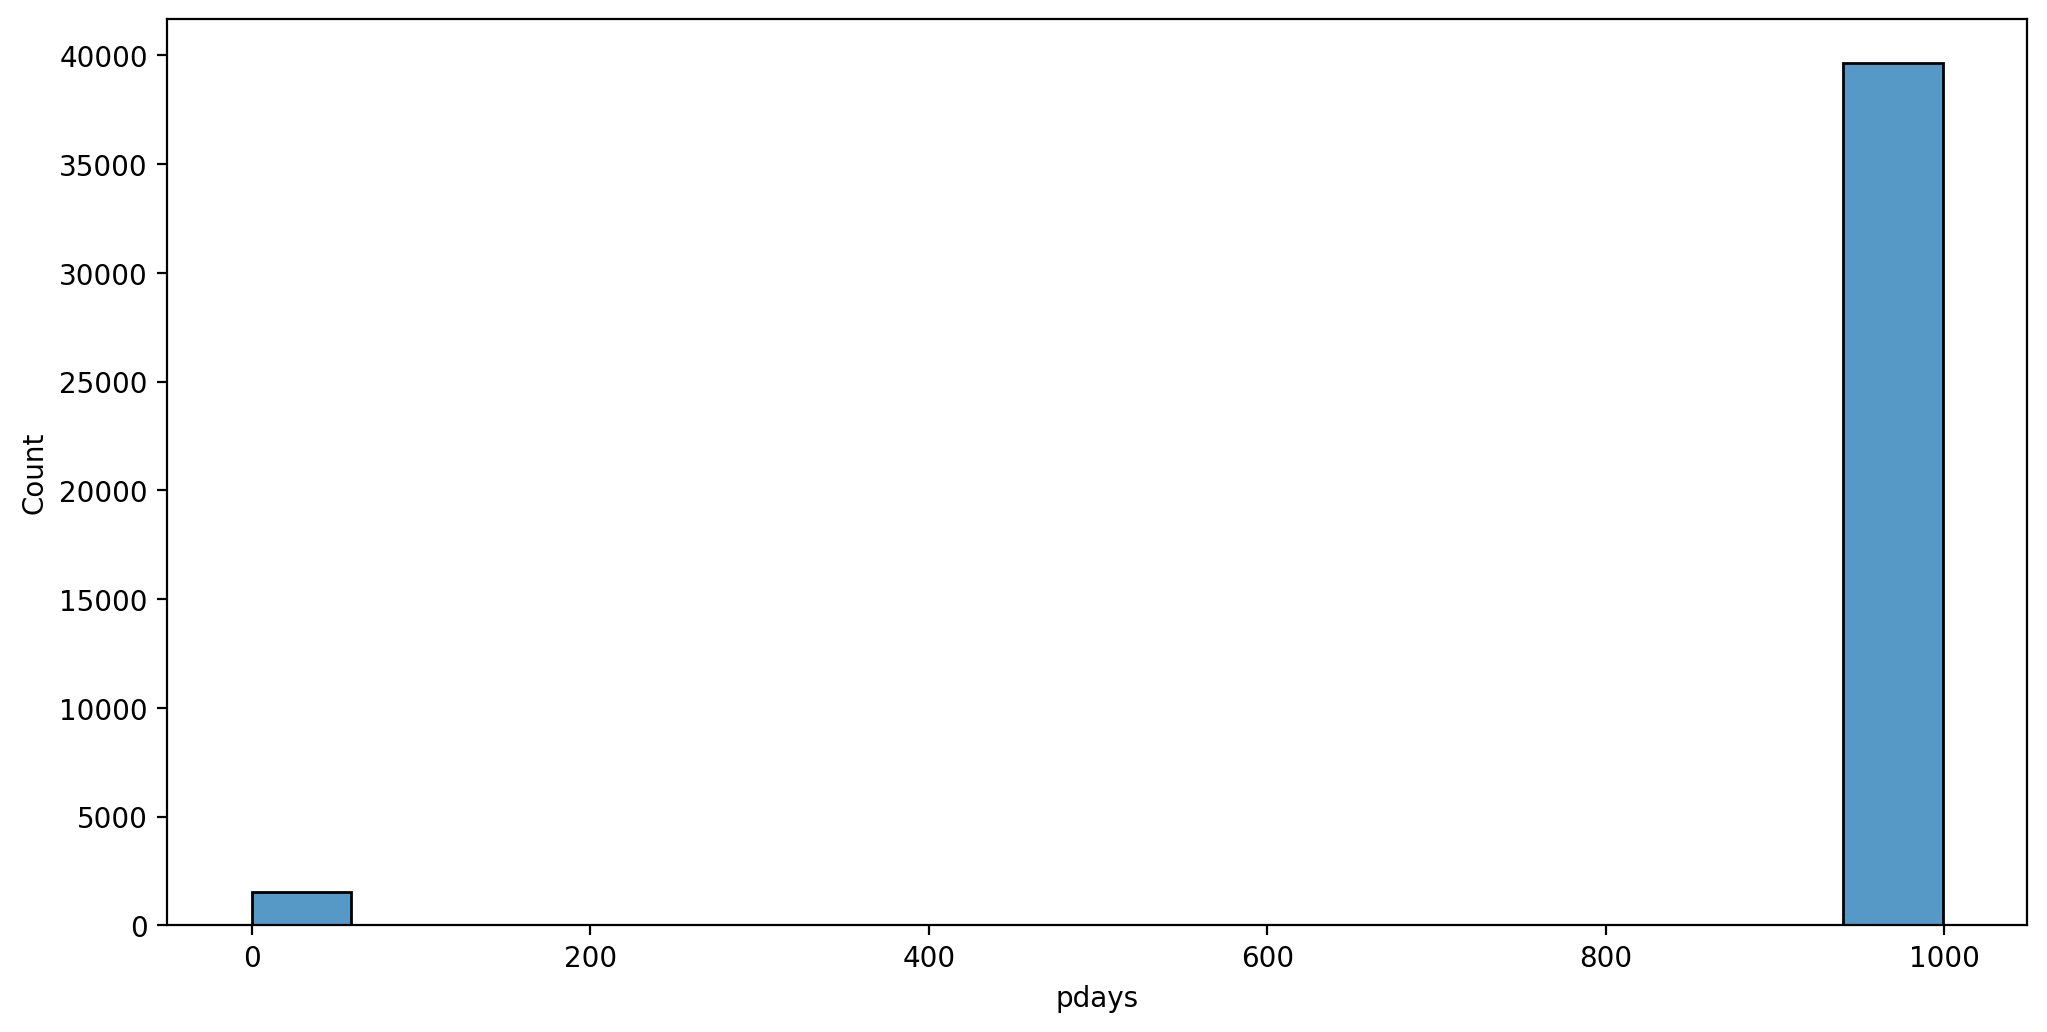

In [174]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

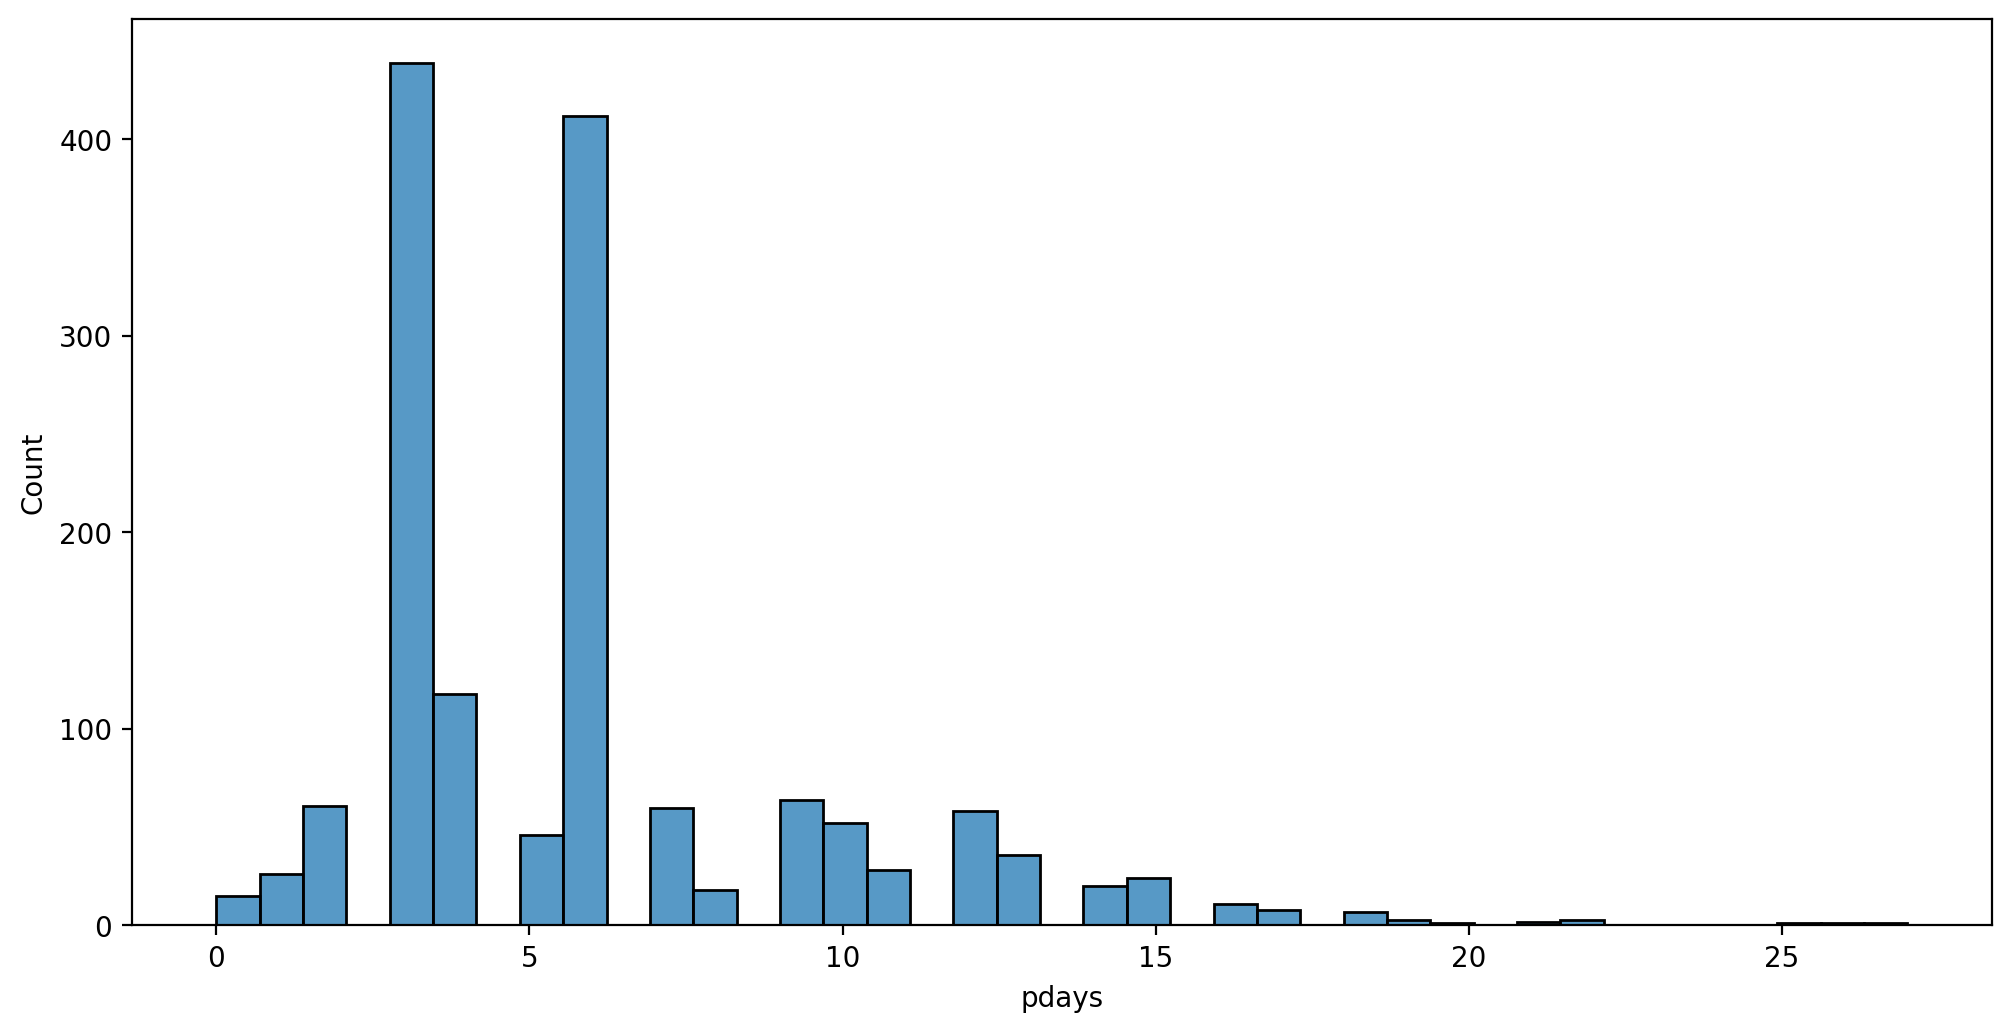

In [175]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**Contact duration - сколько длился телефонный звонок с клиентом?**

(0.0, 2000.0)

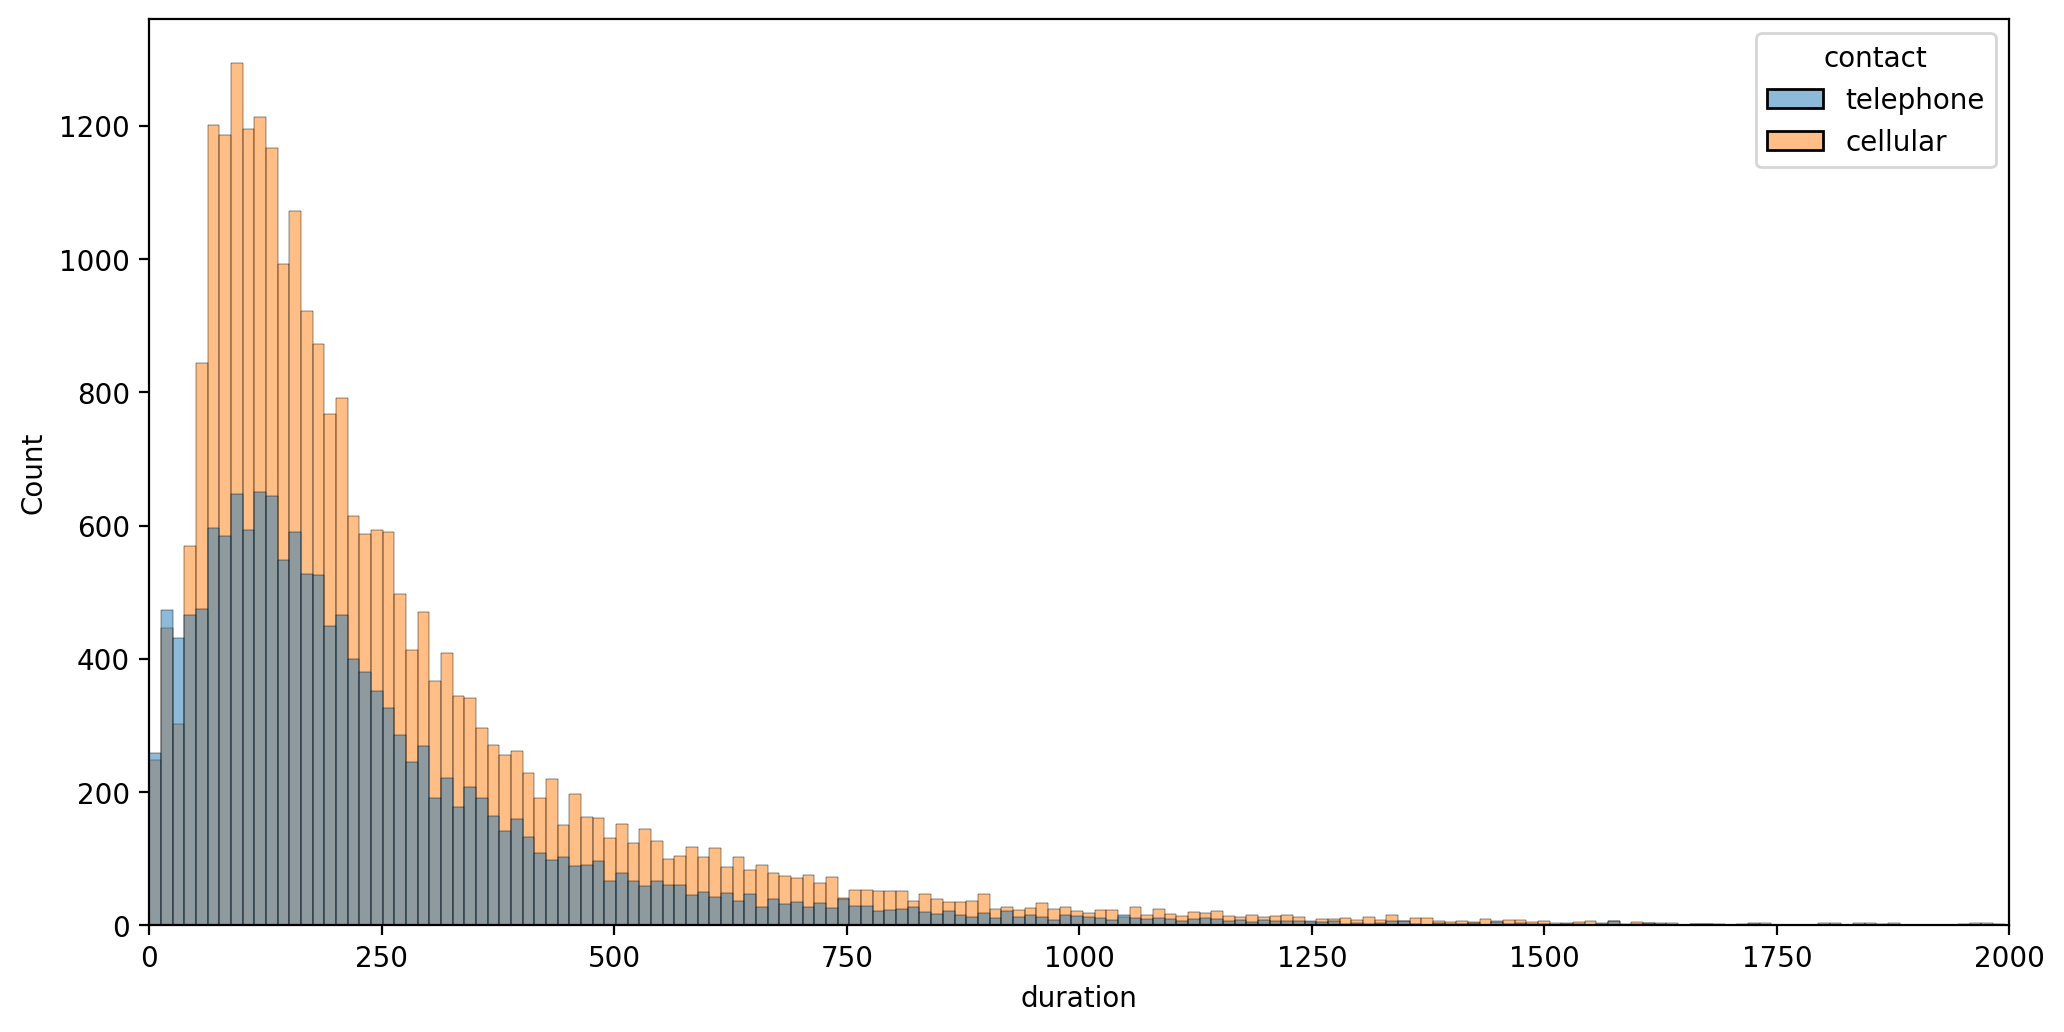

In [176]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

* 14 - previous: сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)
* 15 - poutcome: результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')

<AxesSubplot:xlabel='previous', ylabel='count'>

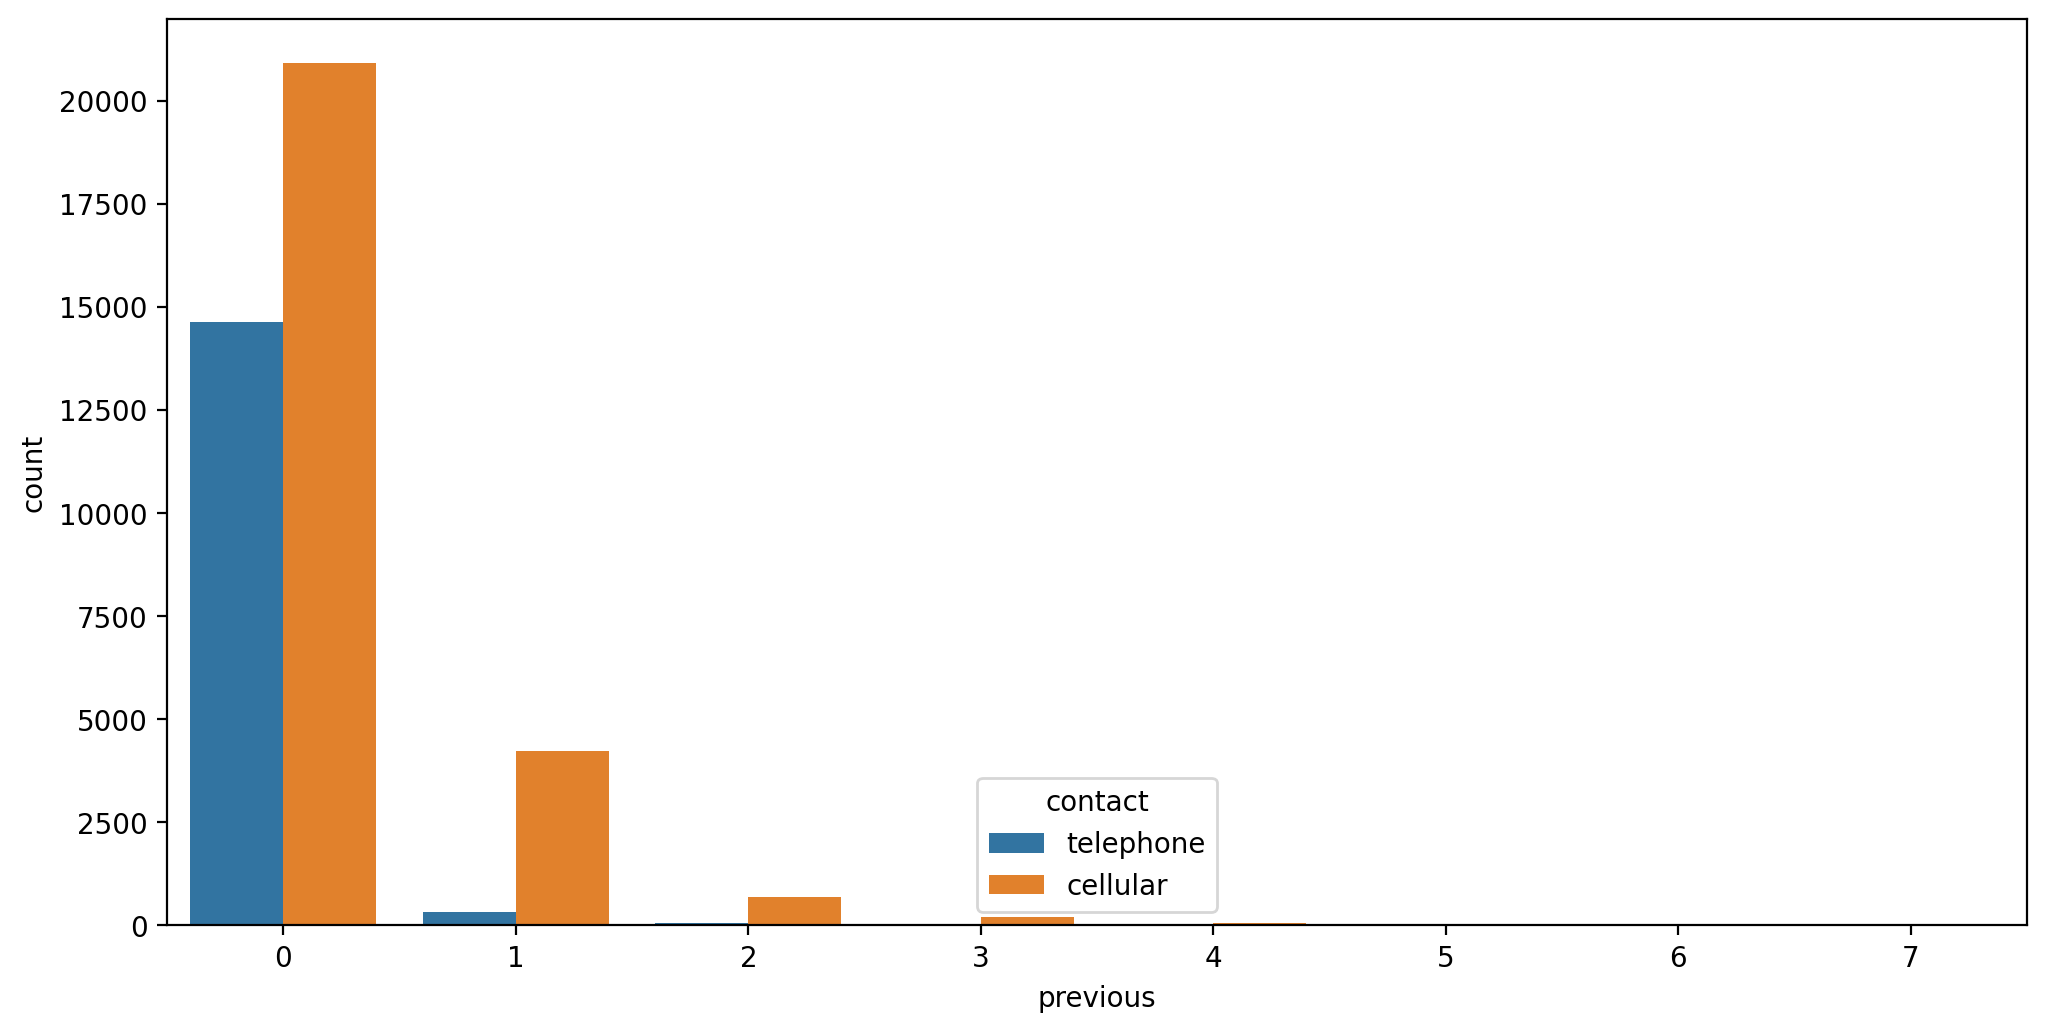

In [177]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

<AxesSubplot:xlabel='contact', ylabel='count'>

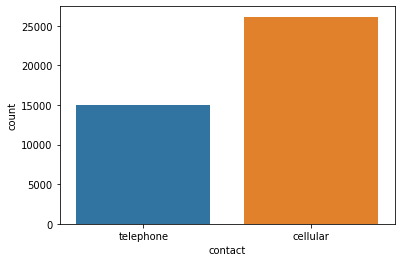

In [178]:
sns.countplot(data=df,x='contact')

In [179]:
# df['previous'].value_counts()
df['previous'].value_counts().sum()-36954
# 36954 vs. 8257

4234

## Категорийные (категориальные) признаки

In [180]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


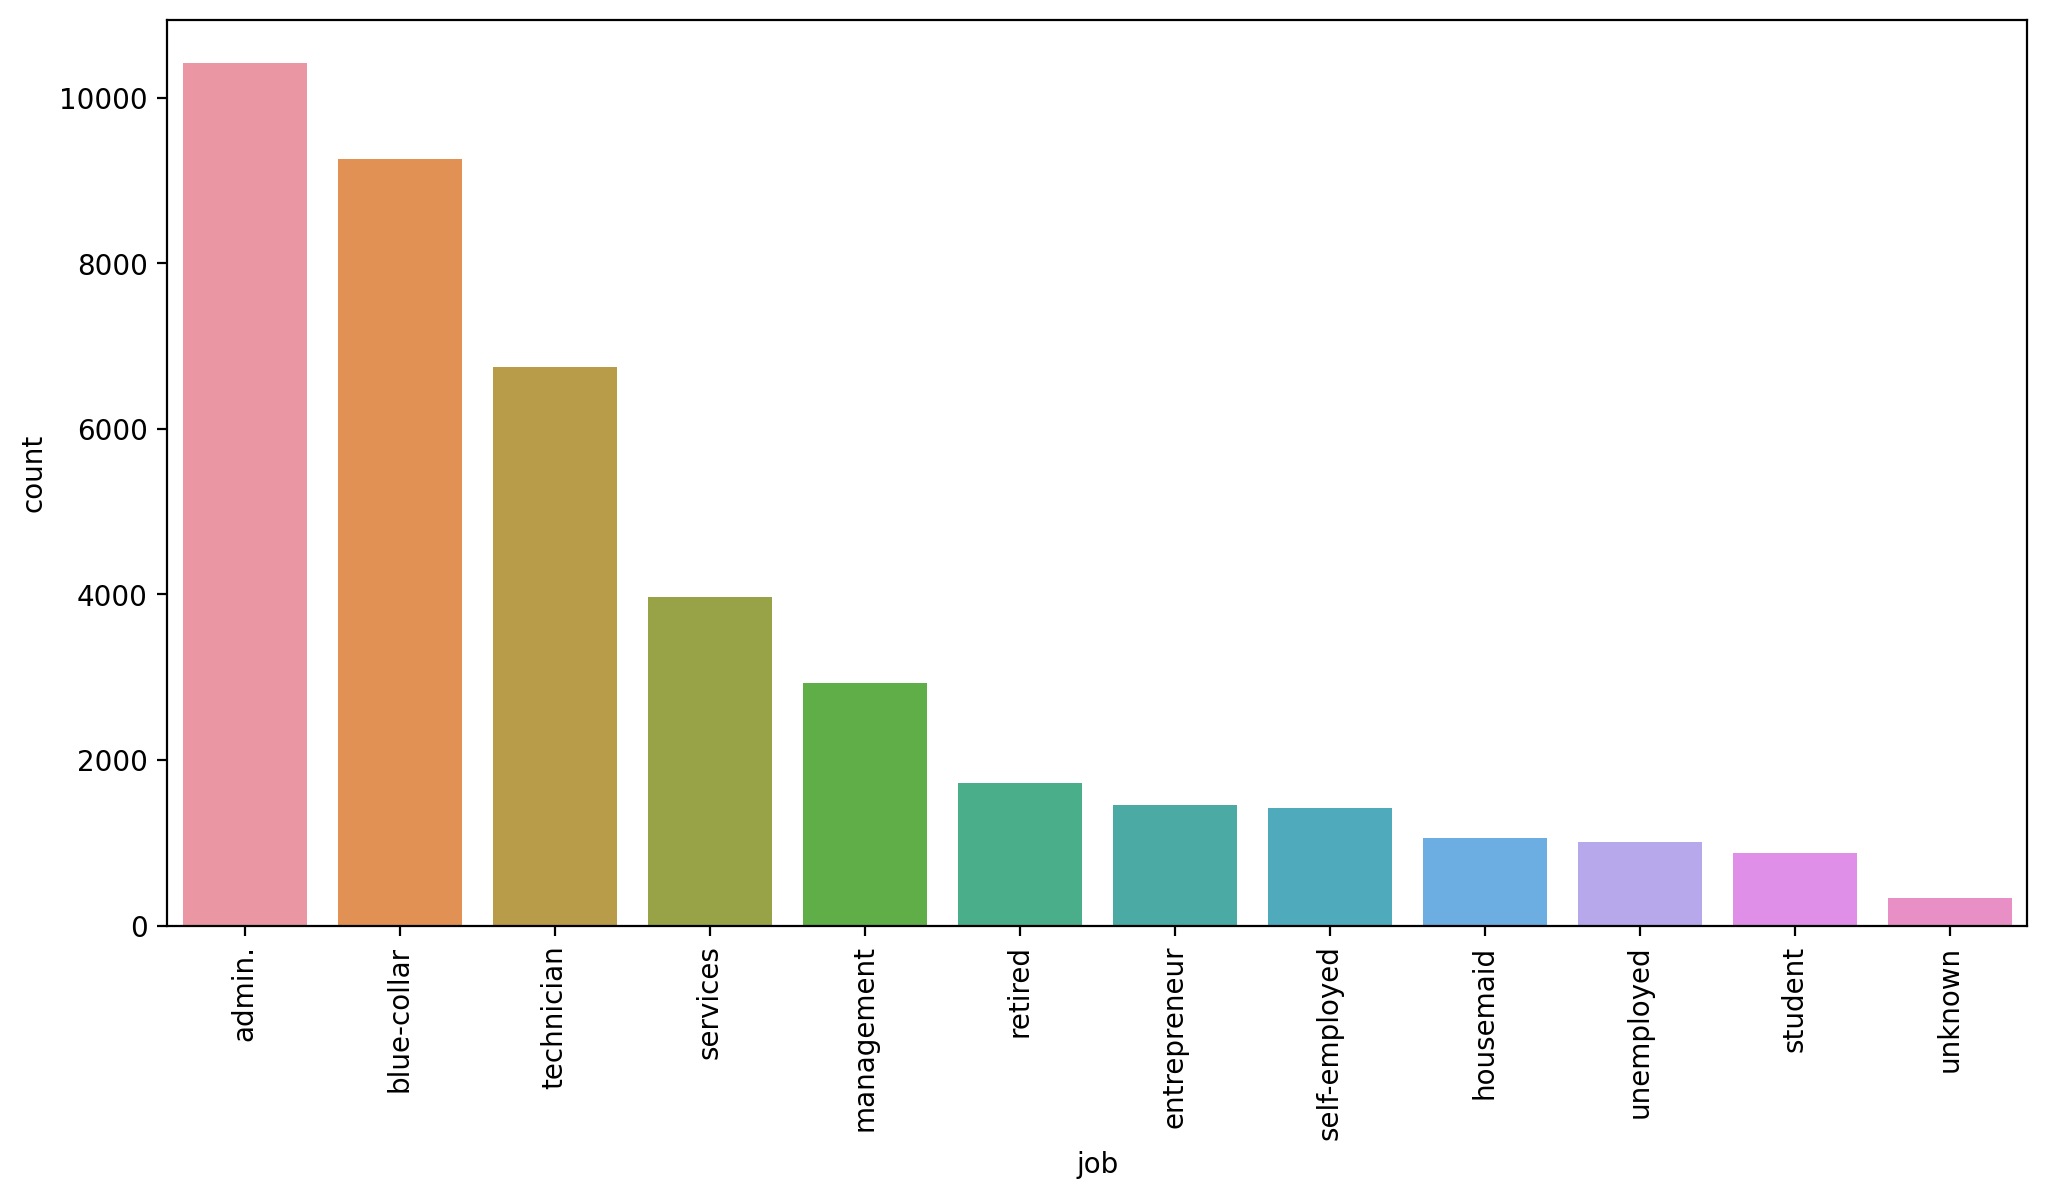

In [181]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

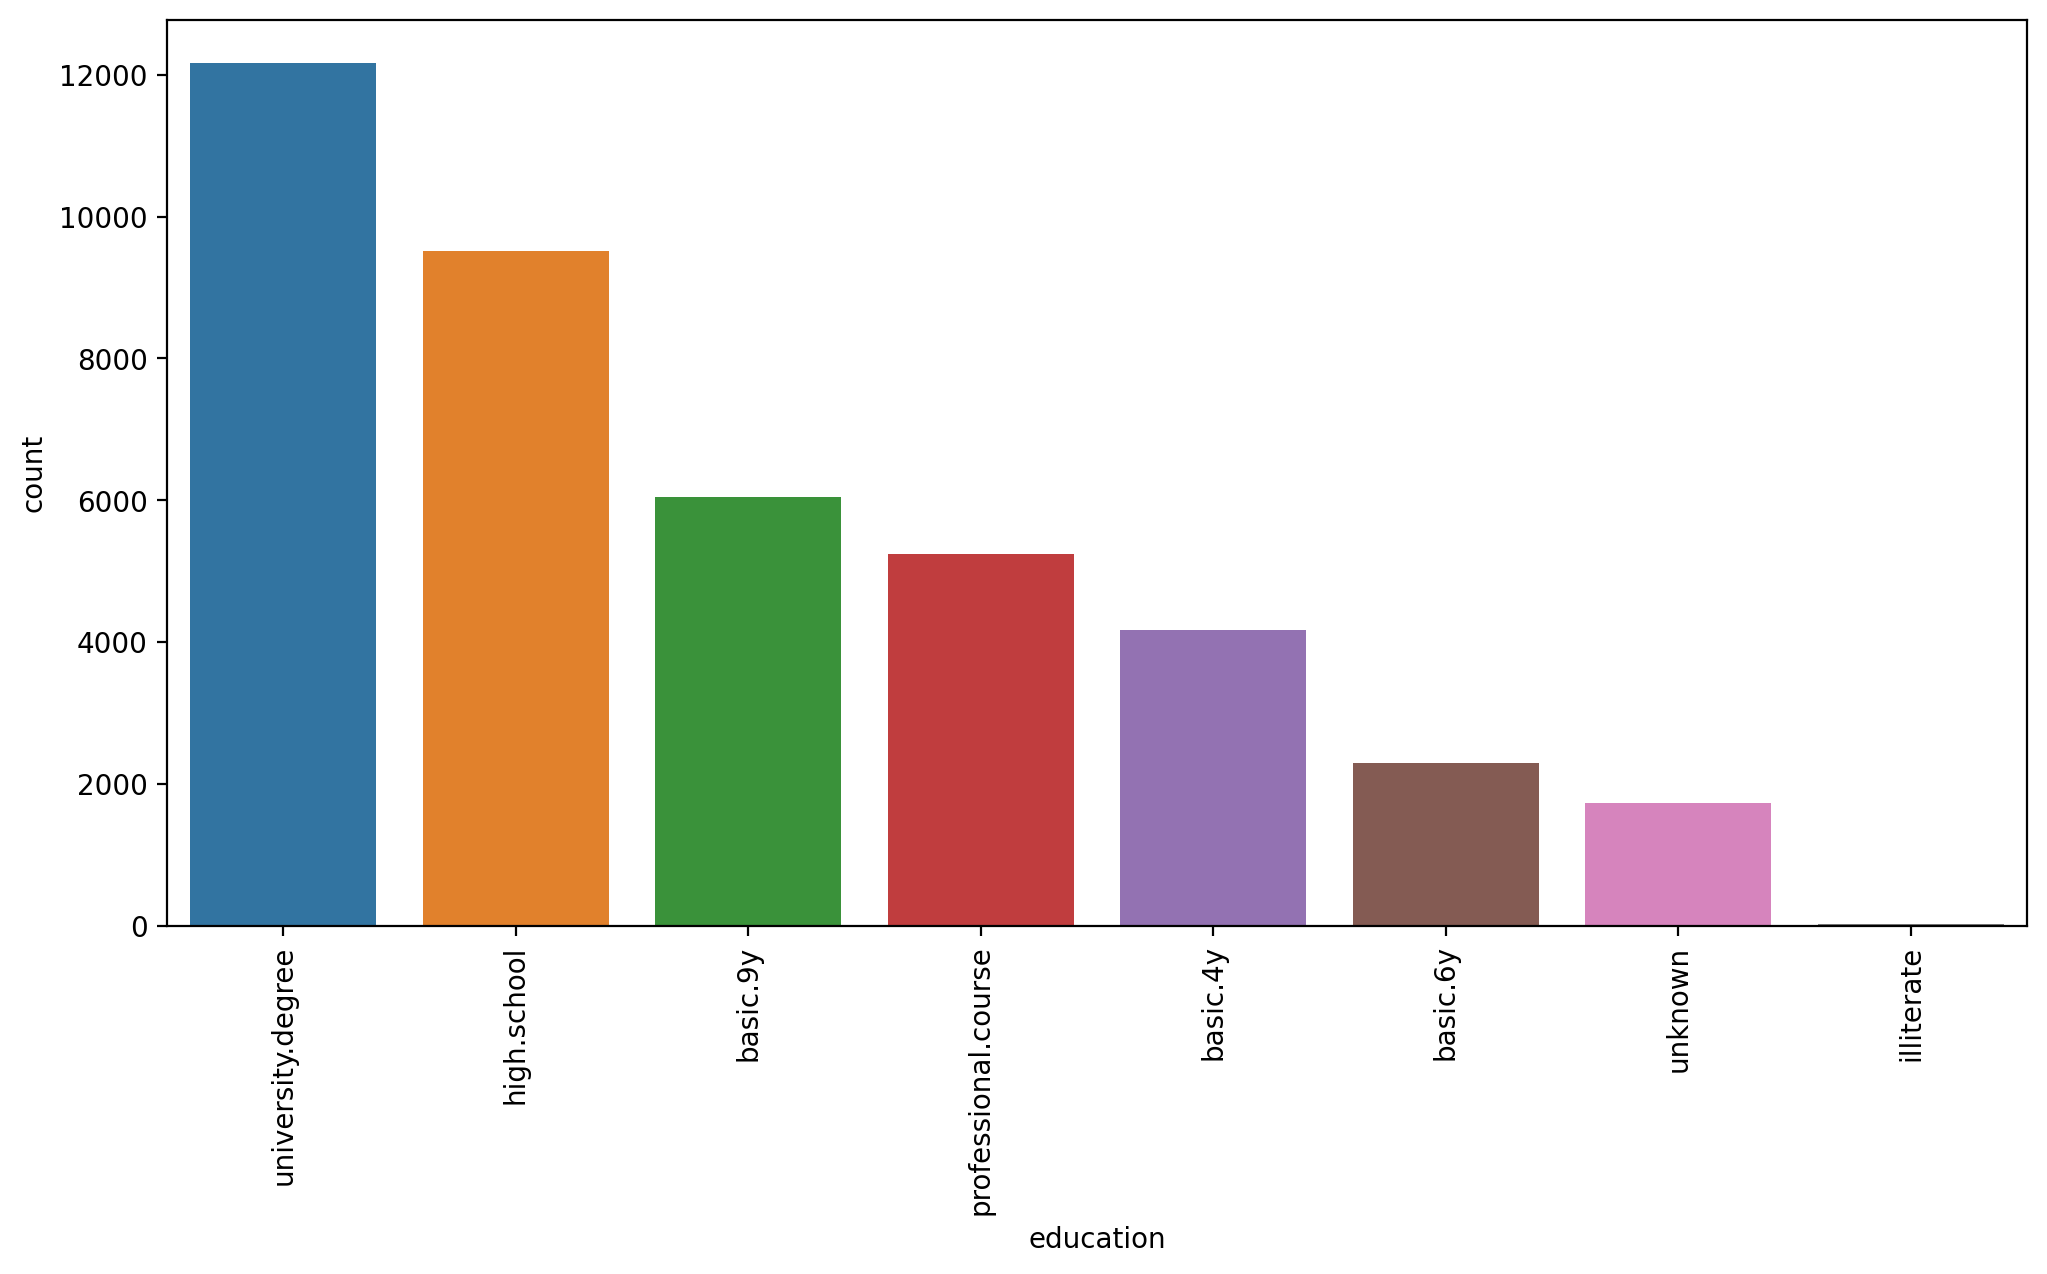

In [182]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

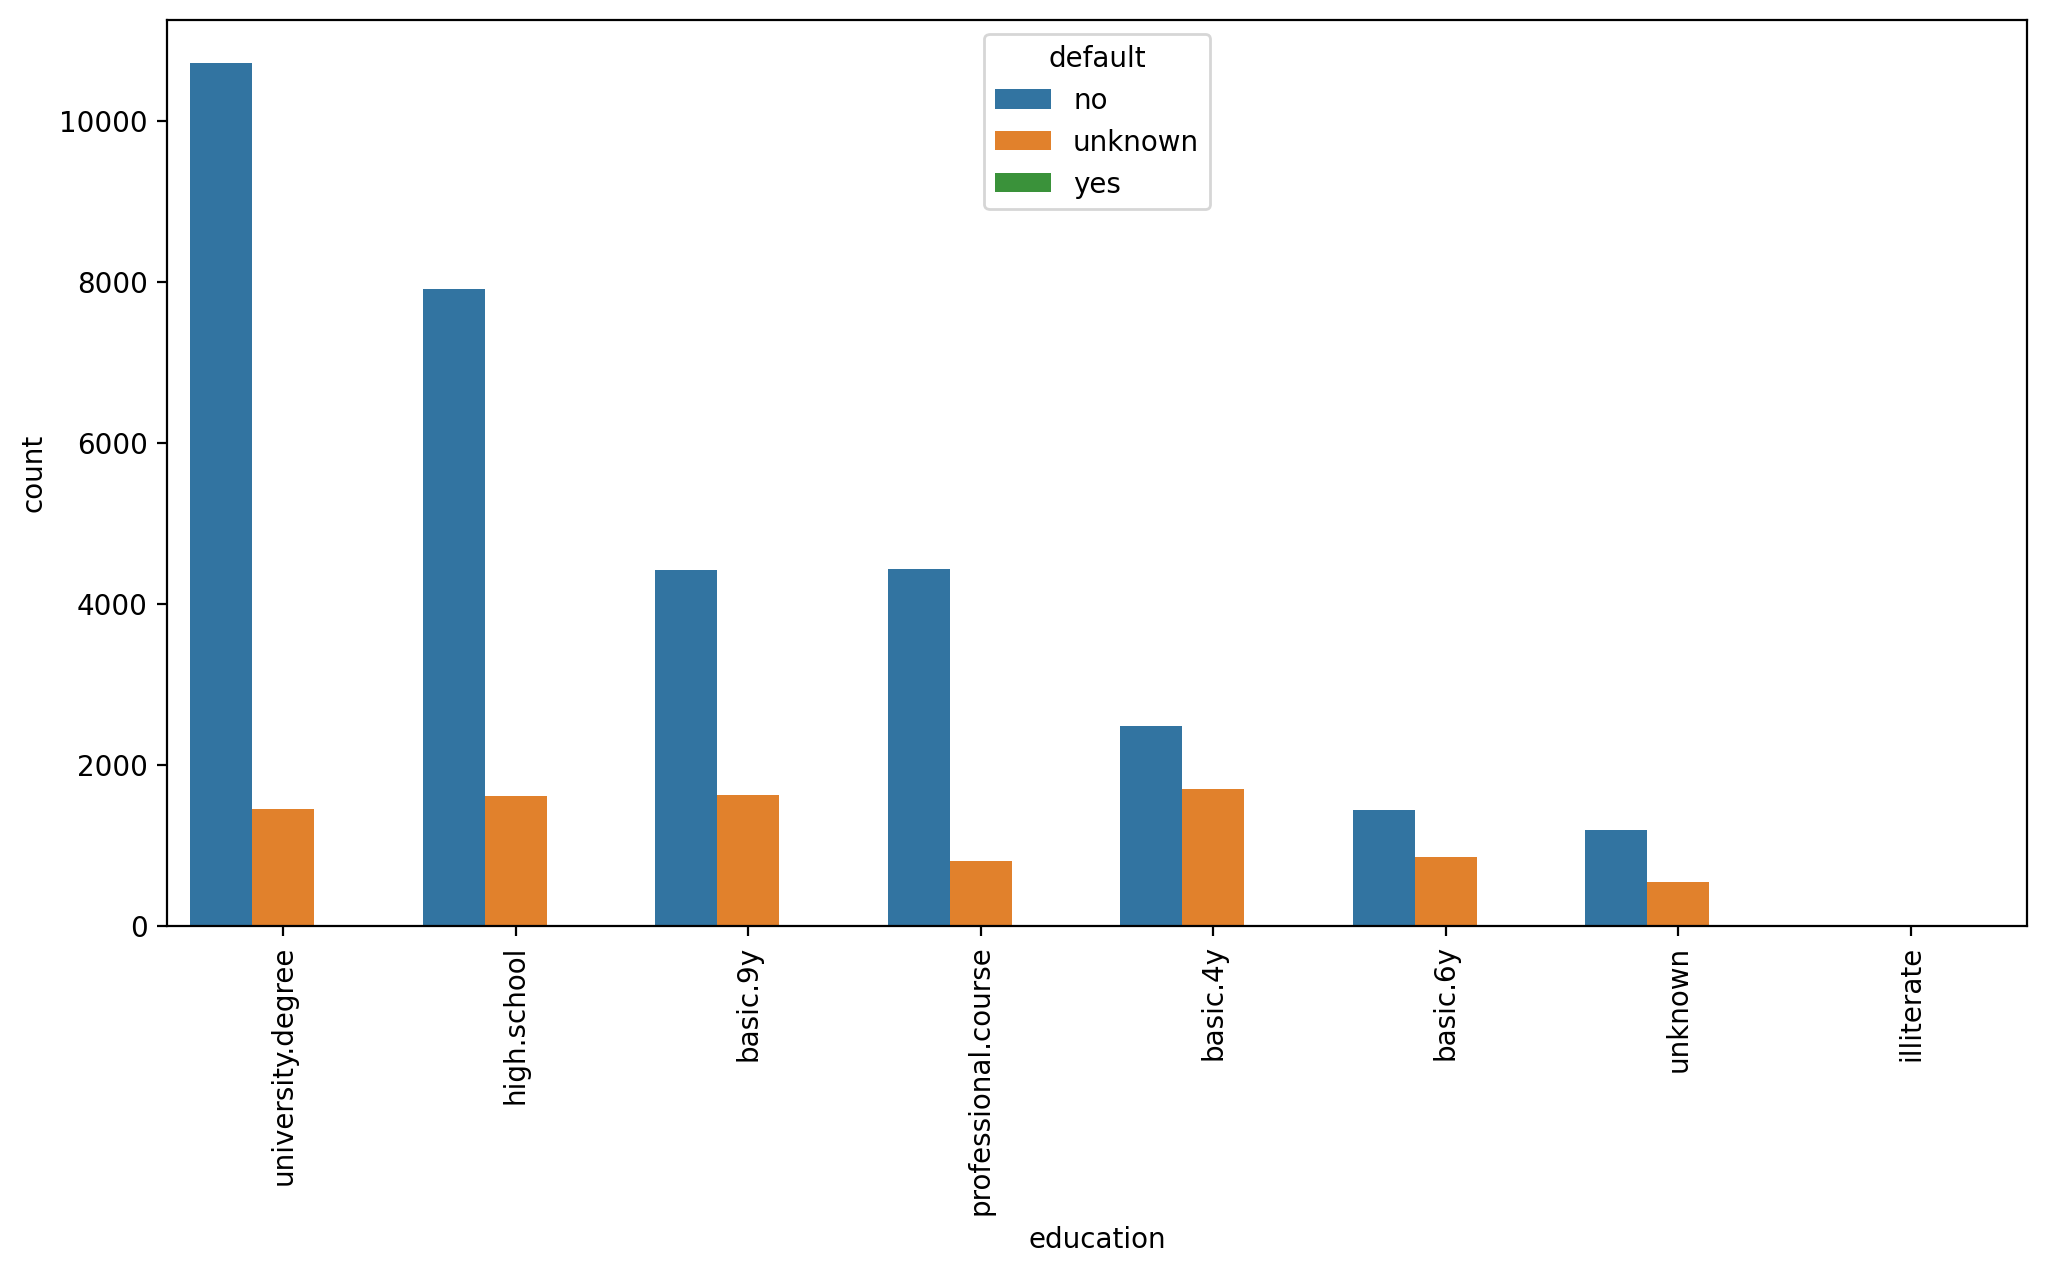

In [183]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

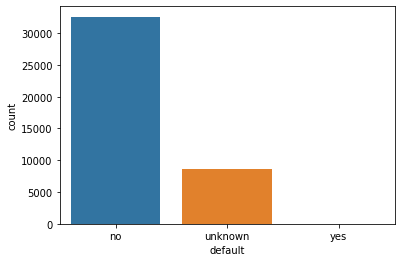

In [184]:
sns.countplot(data=df,x='default')

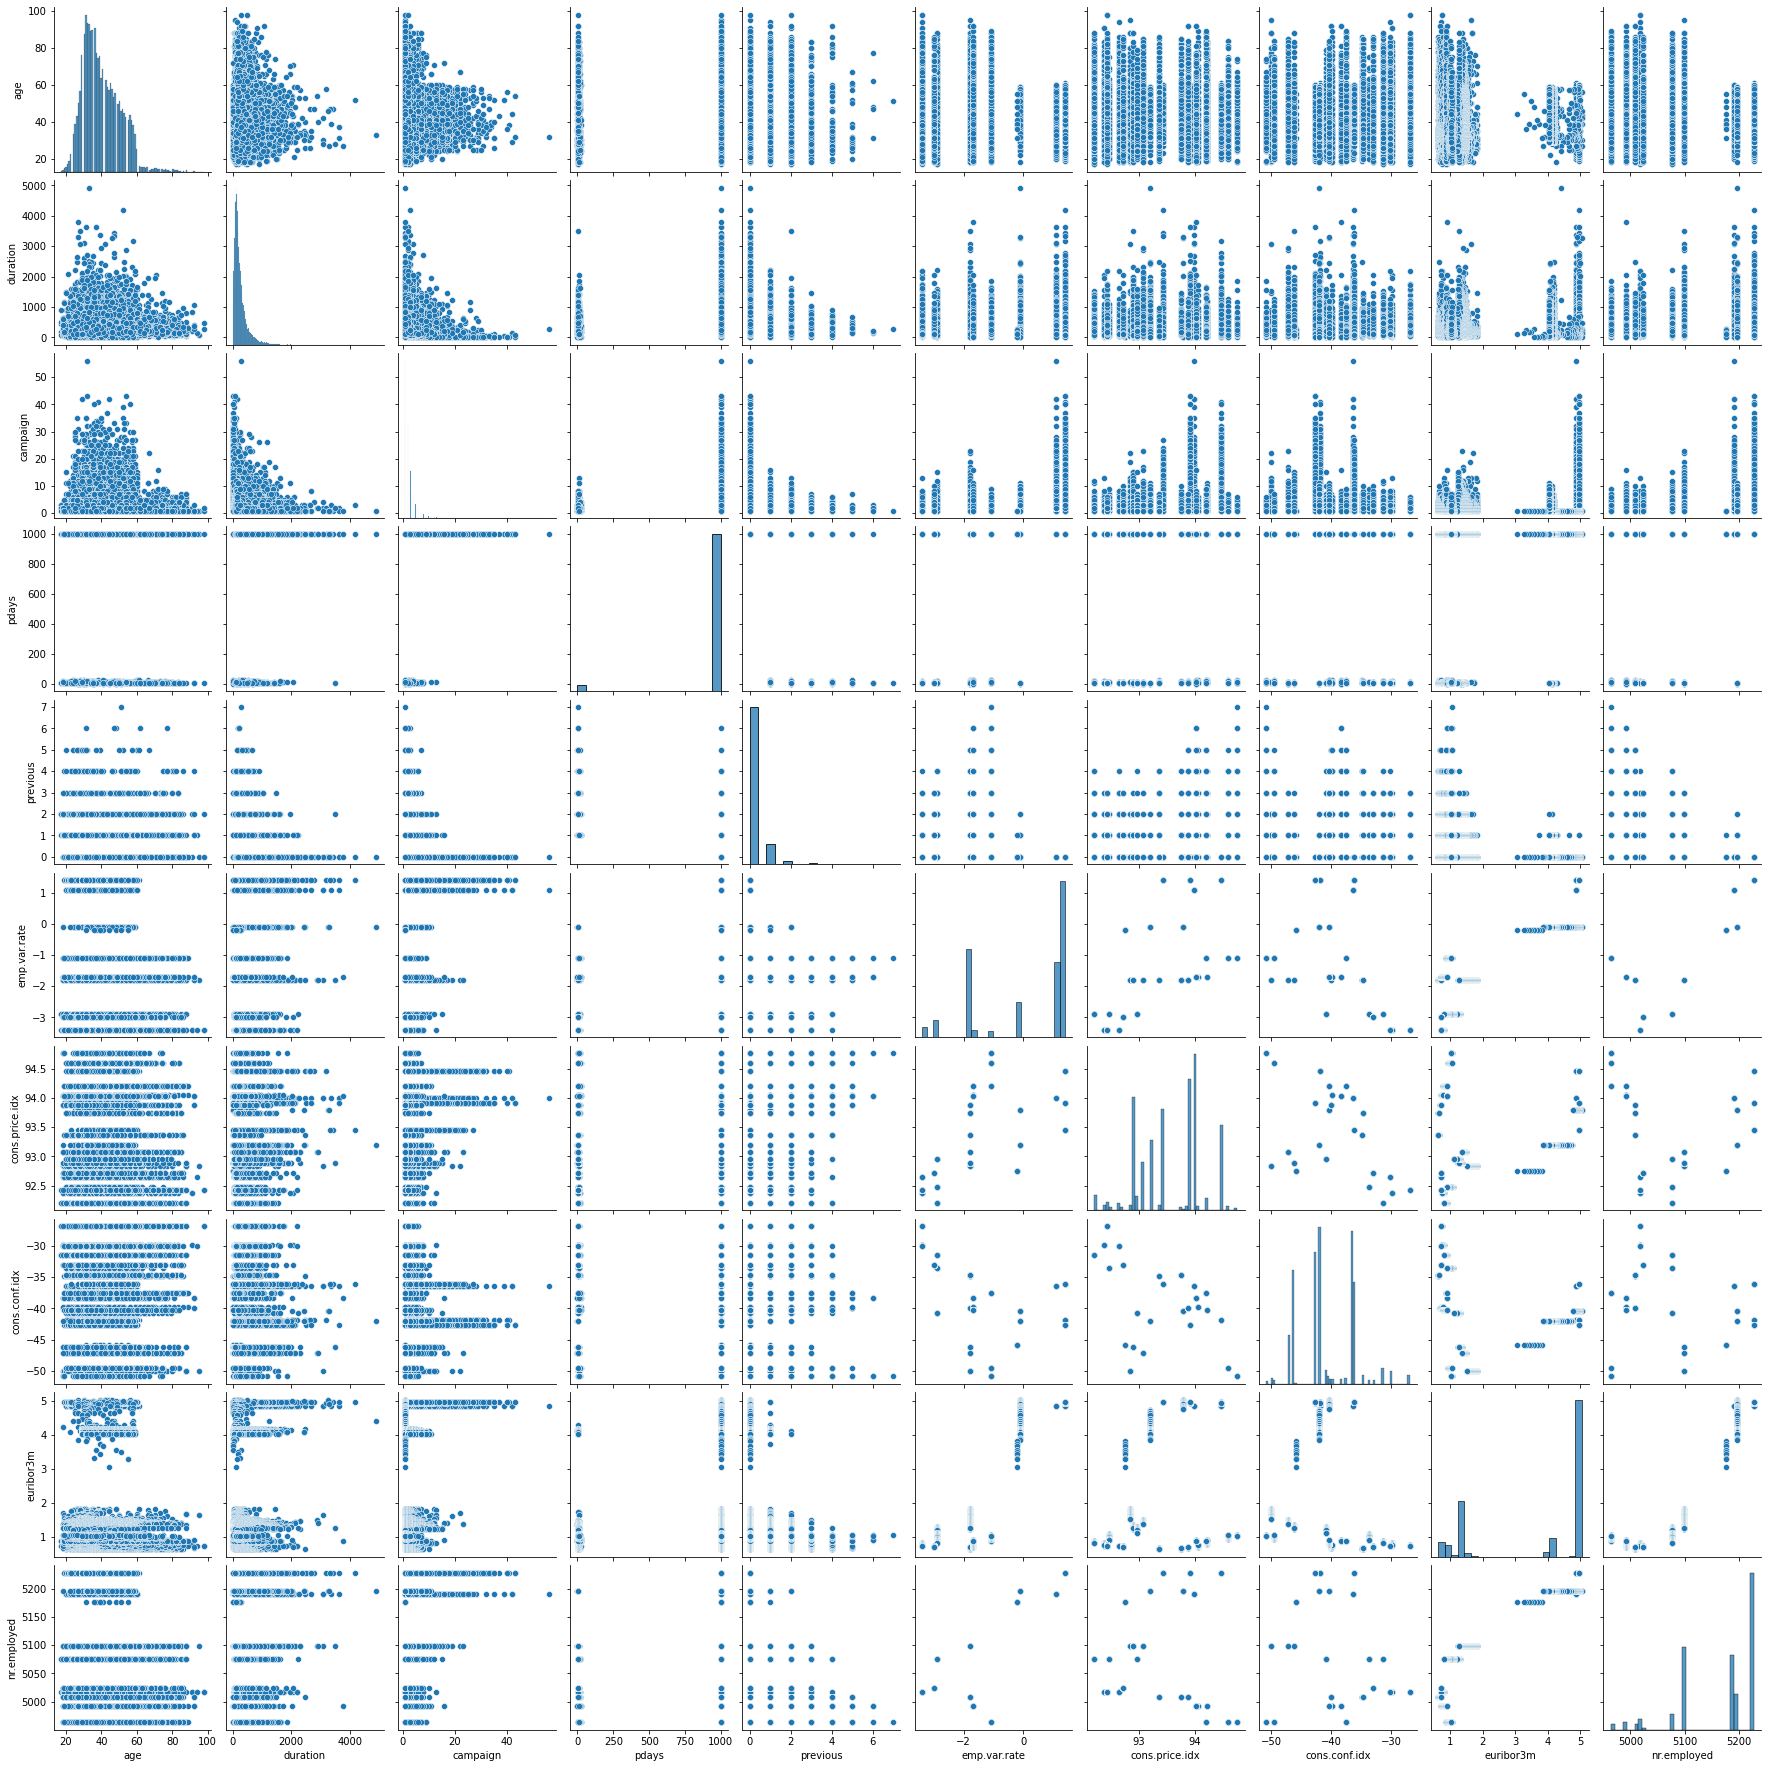

In [185]:
# Это может занять длительное время!
sns.pairplot(df)

## Кластеризация данных

### Подготовка данных

**Напоминание по поводу алгоритмов обучения без учителя (unsupervised learning): не нужно выполнять разбиение на обучающий и тестовый наборы данных! Потому что нет целевой переменной, для сравнения с которой пригодился бы тестовый набор данных!**

Однако нам по-прежнему нужно преобразовать категориальные признаки в числовые - там, где это имеет смысл. А также нужно выполнить масштабирование данных, потому что расстояние между точками является важной частью алгоритмов кластеризации.

In [186]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [192]:
X = pd.get_dummies(df)

In [193]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler = StandardScaler()

In [196]:
scaled_X = scaler.fit_transform(X)

### Создание и обучение модели KMeans

У нас есть следующие методы:

* fit(X[, y, sample_weight])
    * Вычисление центров кластеров (выполнение кластеризации k-means).

* fit_predict(X[, y, sample_weight])
    * Вычисление центров кластеров и предсказание номеров кластеров для каждой точки.

* fit_transform(X[, y, sample_weight])
    * Вычисление центров кластеров и преобразование X в пространство cluster-distance.

* predict(X[, sample_weight])
    * Предсказание ближайшего кластера для каждой точки из данных X.

In [197]:
from sklearn.cluster import KMeans

In [198]:
model = KMeans(n_clusters=2)

In [199]:
# Посмотрите видео-лекцию, чтобы узнать разницу между этой командой, fit() и transform()
cluster_labels = model.fit_predict(scaled_X)

In [200]:
# ВАЖНОЕ ЗАМЕЧАНИЕ: Ваши 0 и 1 могут быть противоположными,
# потому что сами номера кластеров не имеют особого смысла!
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [201]:
len(scaled_X)

41188

In [202]:
len(cluster_labels)

41188

In [203]:
X['Cluster'] = cluster_labels

<AxesSubplot:>

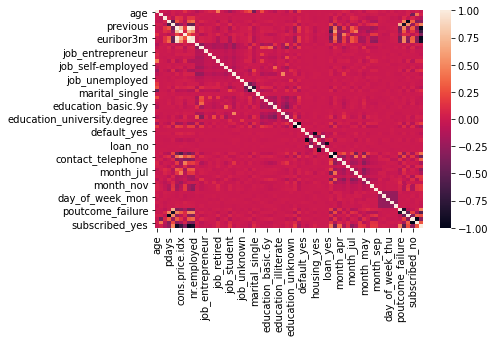

In [204]:
sns.heatmap(X.corr())

In [205]:
X.corr()['Cluster']

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

<AxesSubplot:>

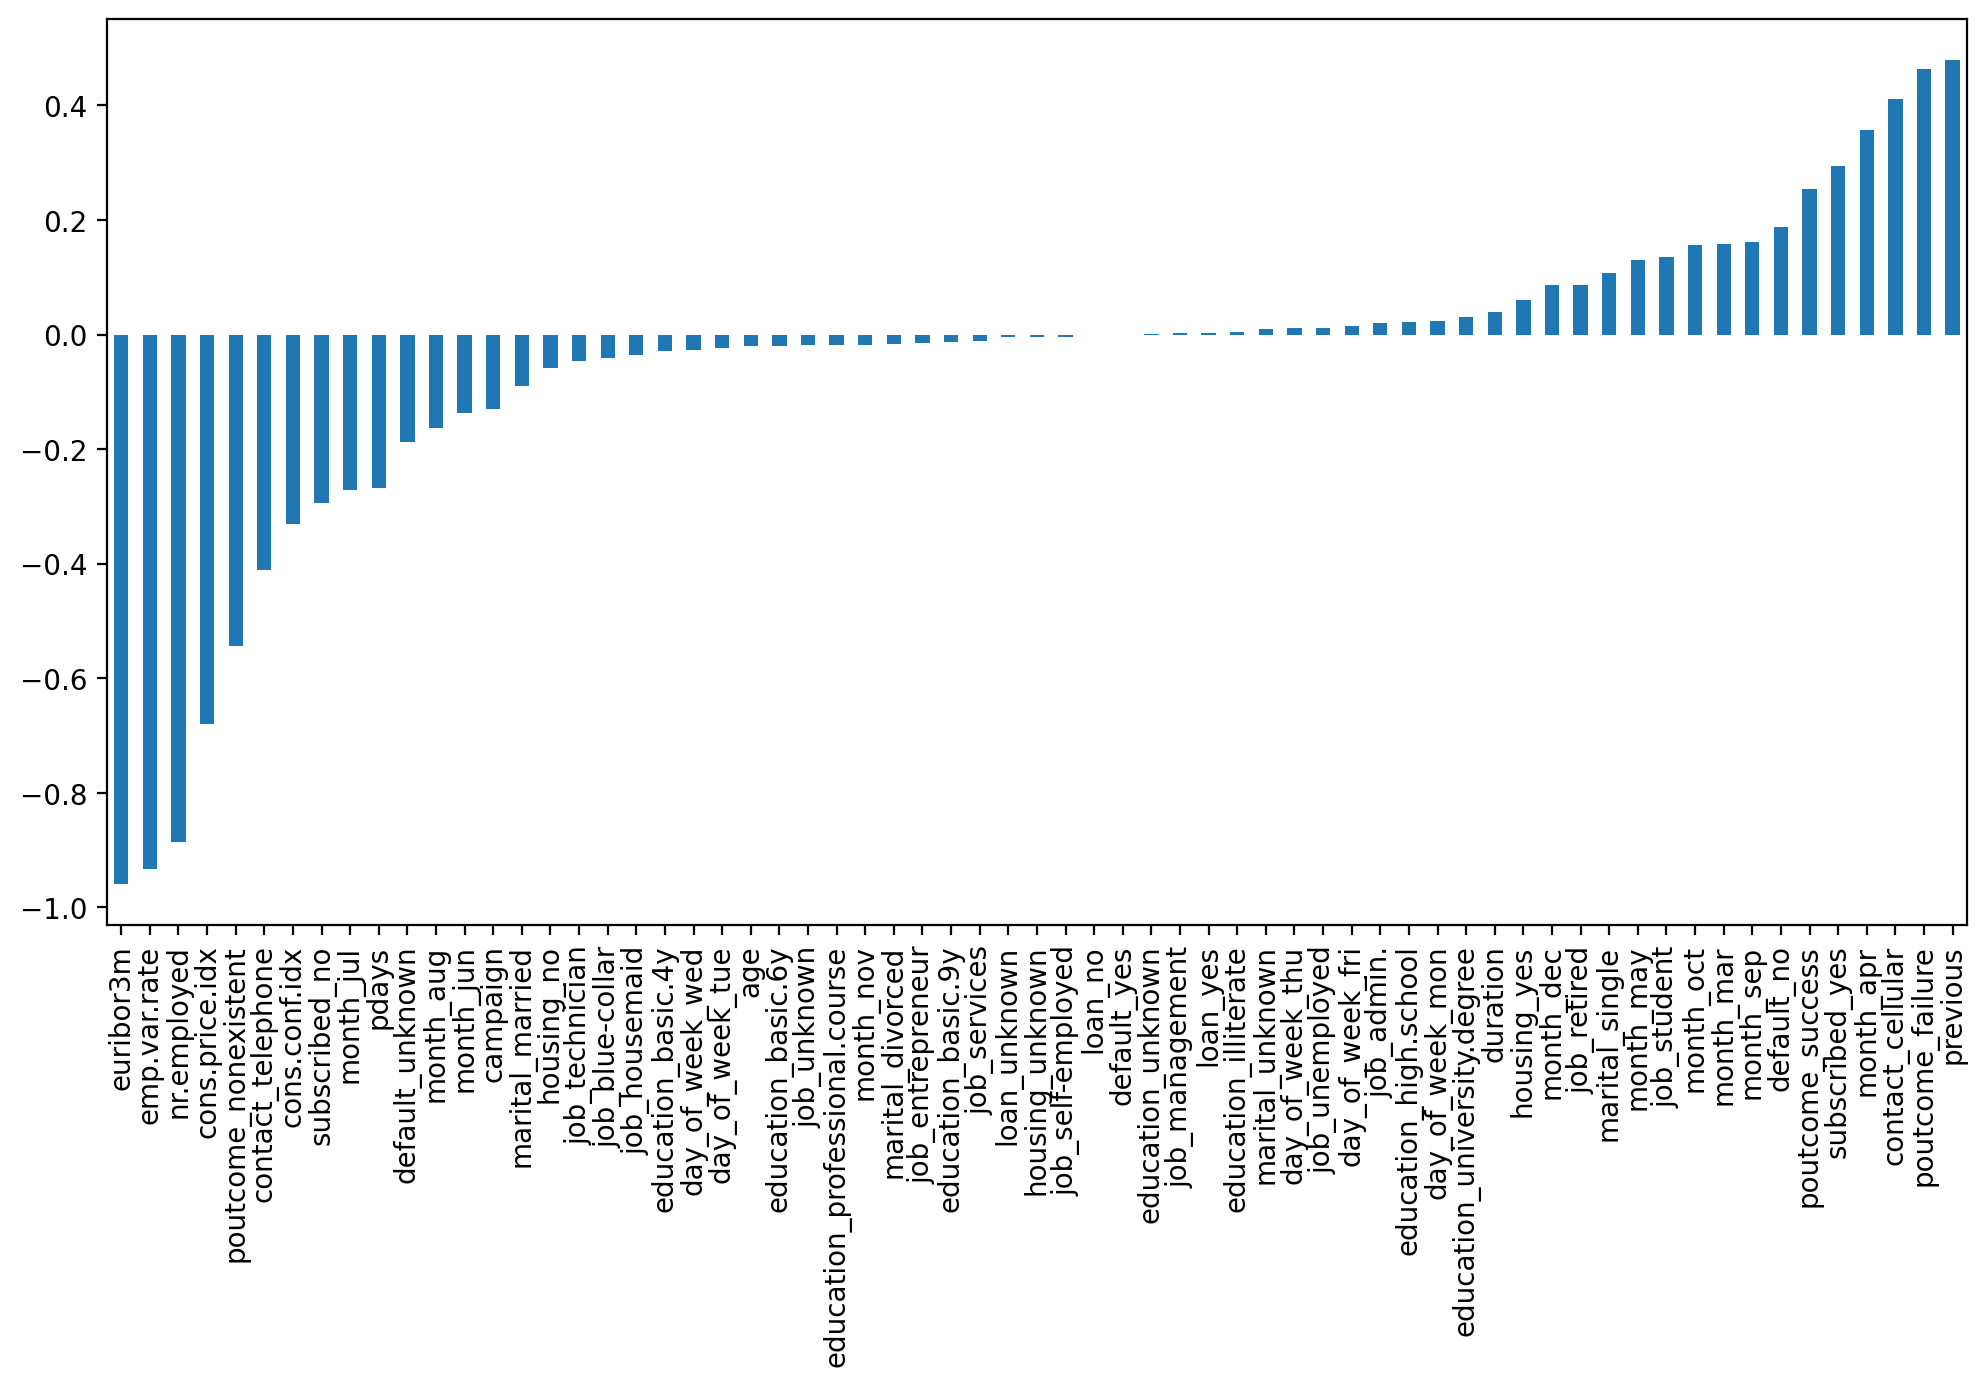

In [206]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Выбираем значение K

In [207]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    # Сумма квадратов расстояний от точек до ближайших центров кластеров
    # (SSD - Sum of squared distances) 
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

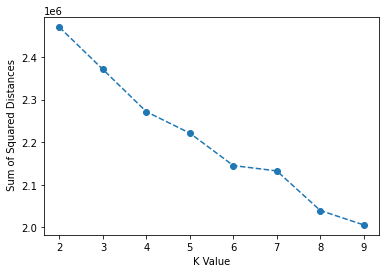

In [212]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Анализируем **уменьшение** метрики SSD

In [213]:
ssd

[2469792.4095956706,
 2370787.709348152,
 2271502.7007717513,
 2221128.900236805,
 2145067.141554143,
 2132468.751266735,
 2039460.8832193925,
 2005692.7454239195]

In [217]:
# Изменение метрики SSD - текущее минус предыдущее значение!
pd.Series(ssd).diff()

0             NaN
1   -99004.700248
2   -99285.008576
3   -50373.800535
4   -76061.758683
5   -12598.390287
6   -93007.868047
7   -33768.137795
dtype: float64

<AxesSubplot:>

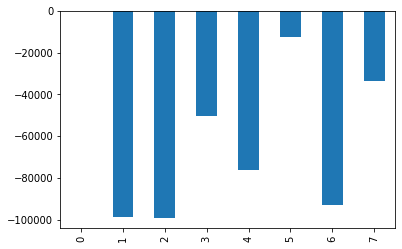

In [230]:
pd.Series(ssd).diff().plot(kind='bar')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../DATA/bank-full.csv')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='age', ylabel='Count'>

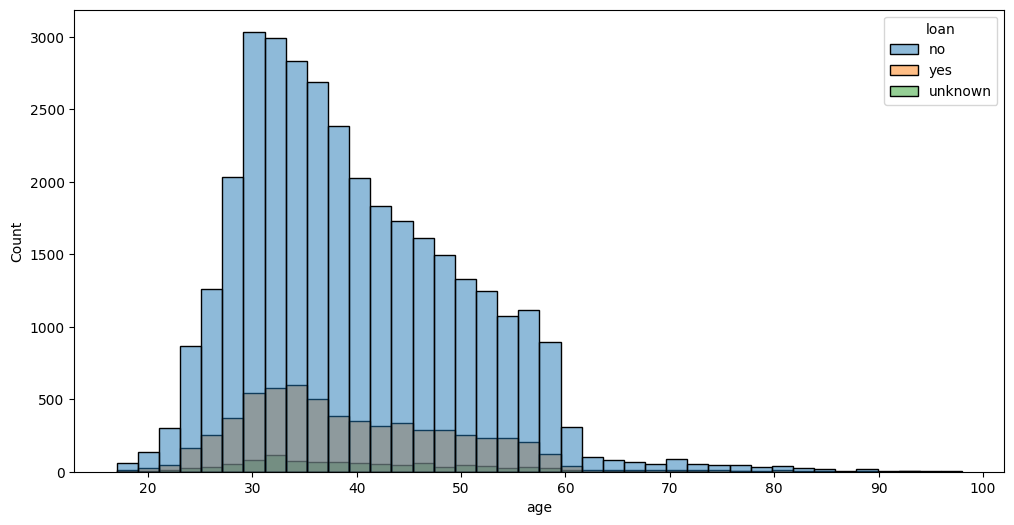

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', bins=40, hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

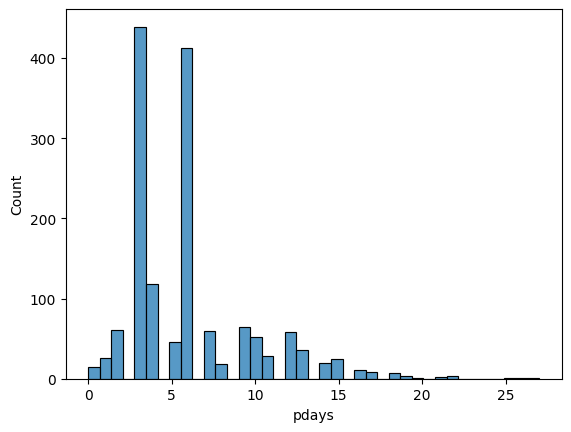

In [11]:
sns.histplot(data=df[df['pdays'] != 999], x='pdays')

In [12]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [13]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

(0.0, 1000.0)

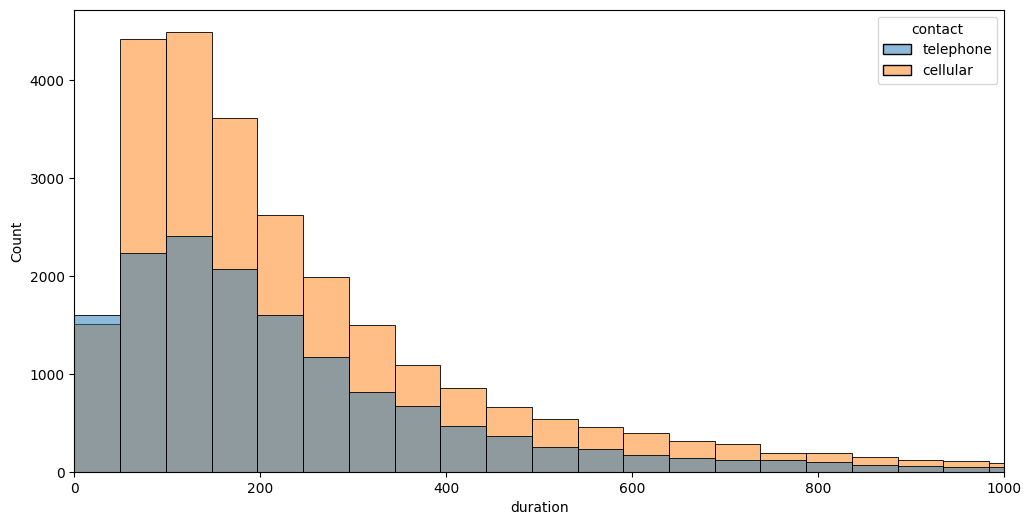

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='duration', bins=100, hue='contact')
plt.xlim(0, 1000)

<Axes: xlabel='contact', ylabel='count'>

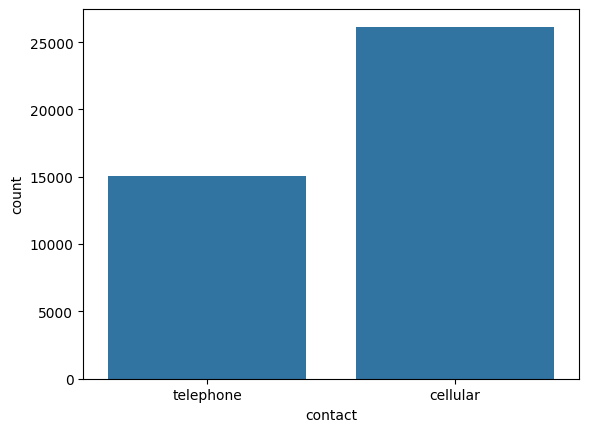

In [15]:
sns.countplot(data=df, x='contact')

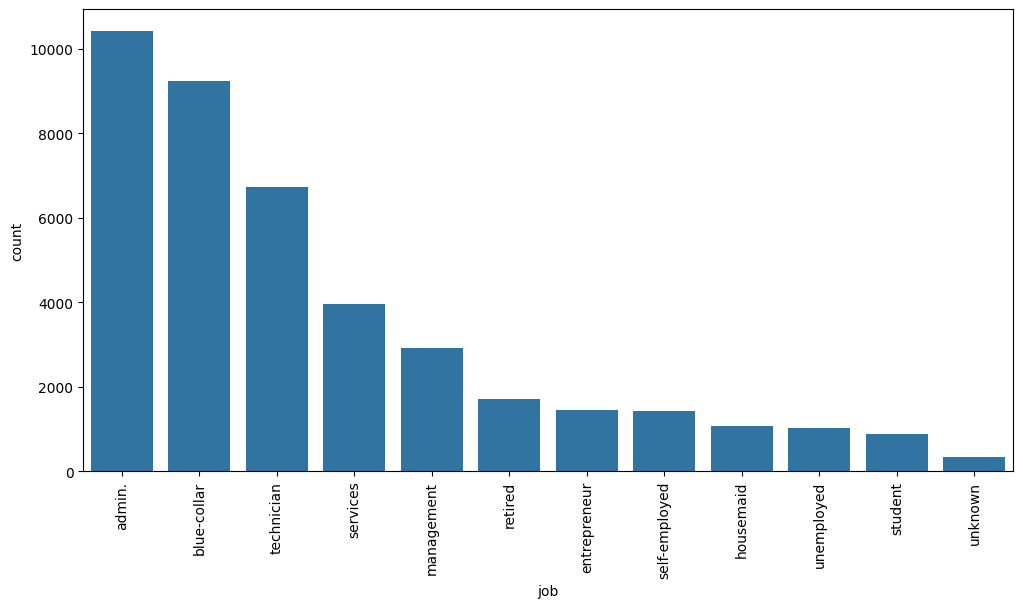

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

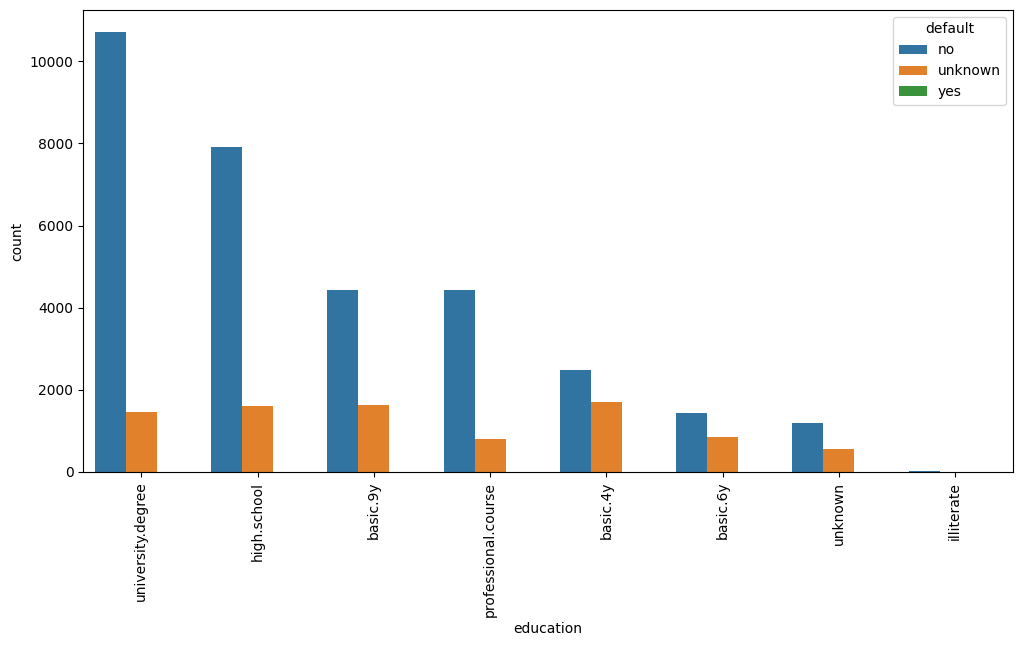

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

<Axes: xlabel='default', ylabel='count'>

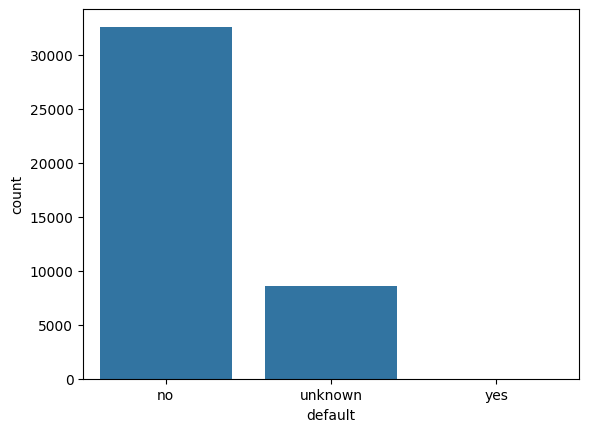

In [18]:
sns.countplot(data=df, x='default')

In [19]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

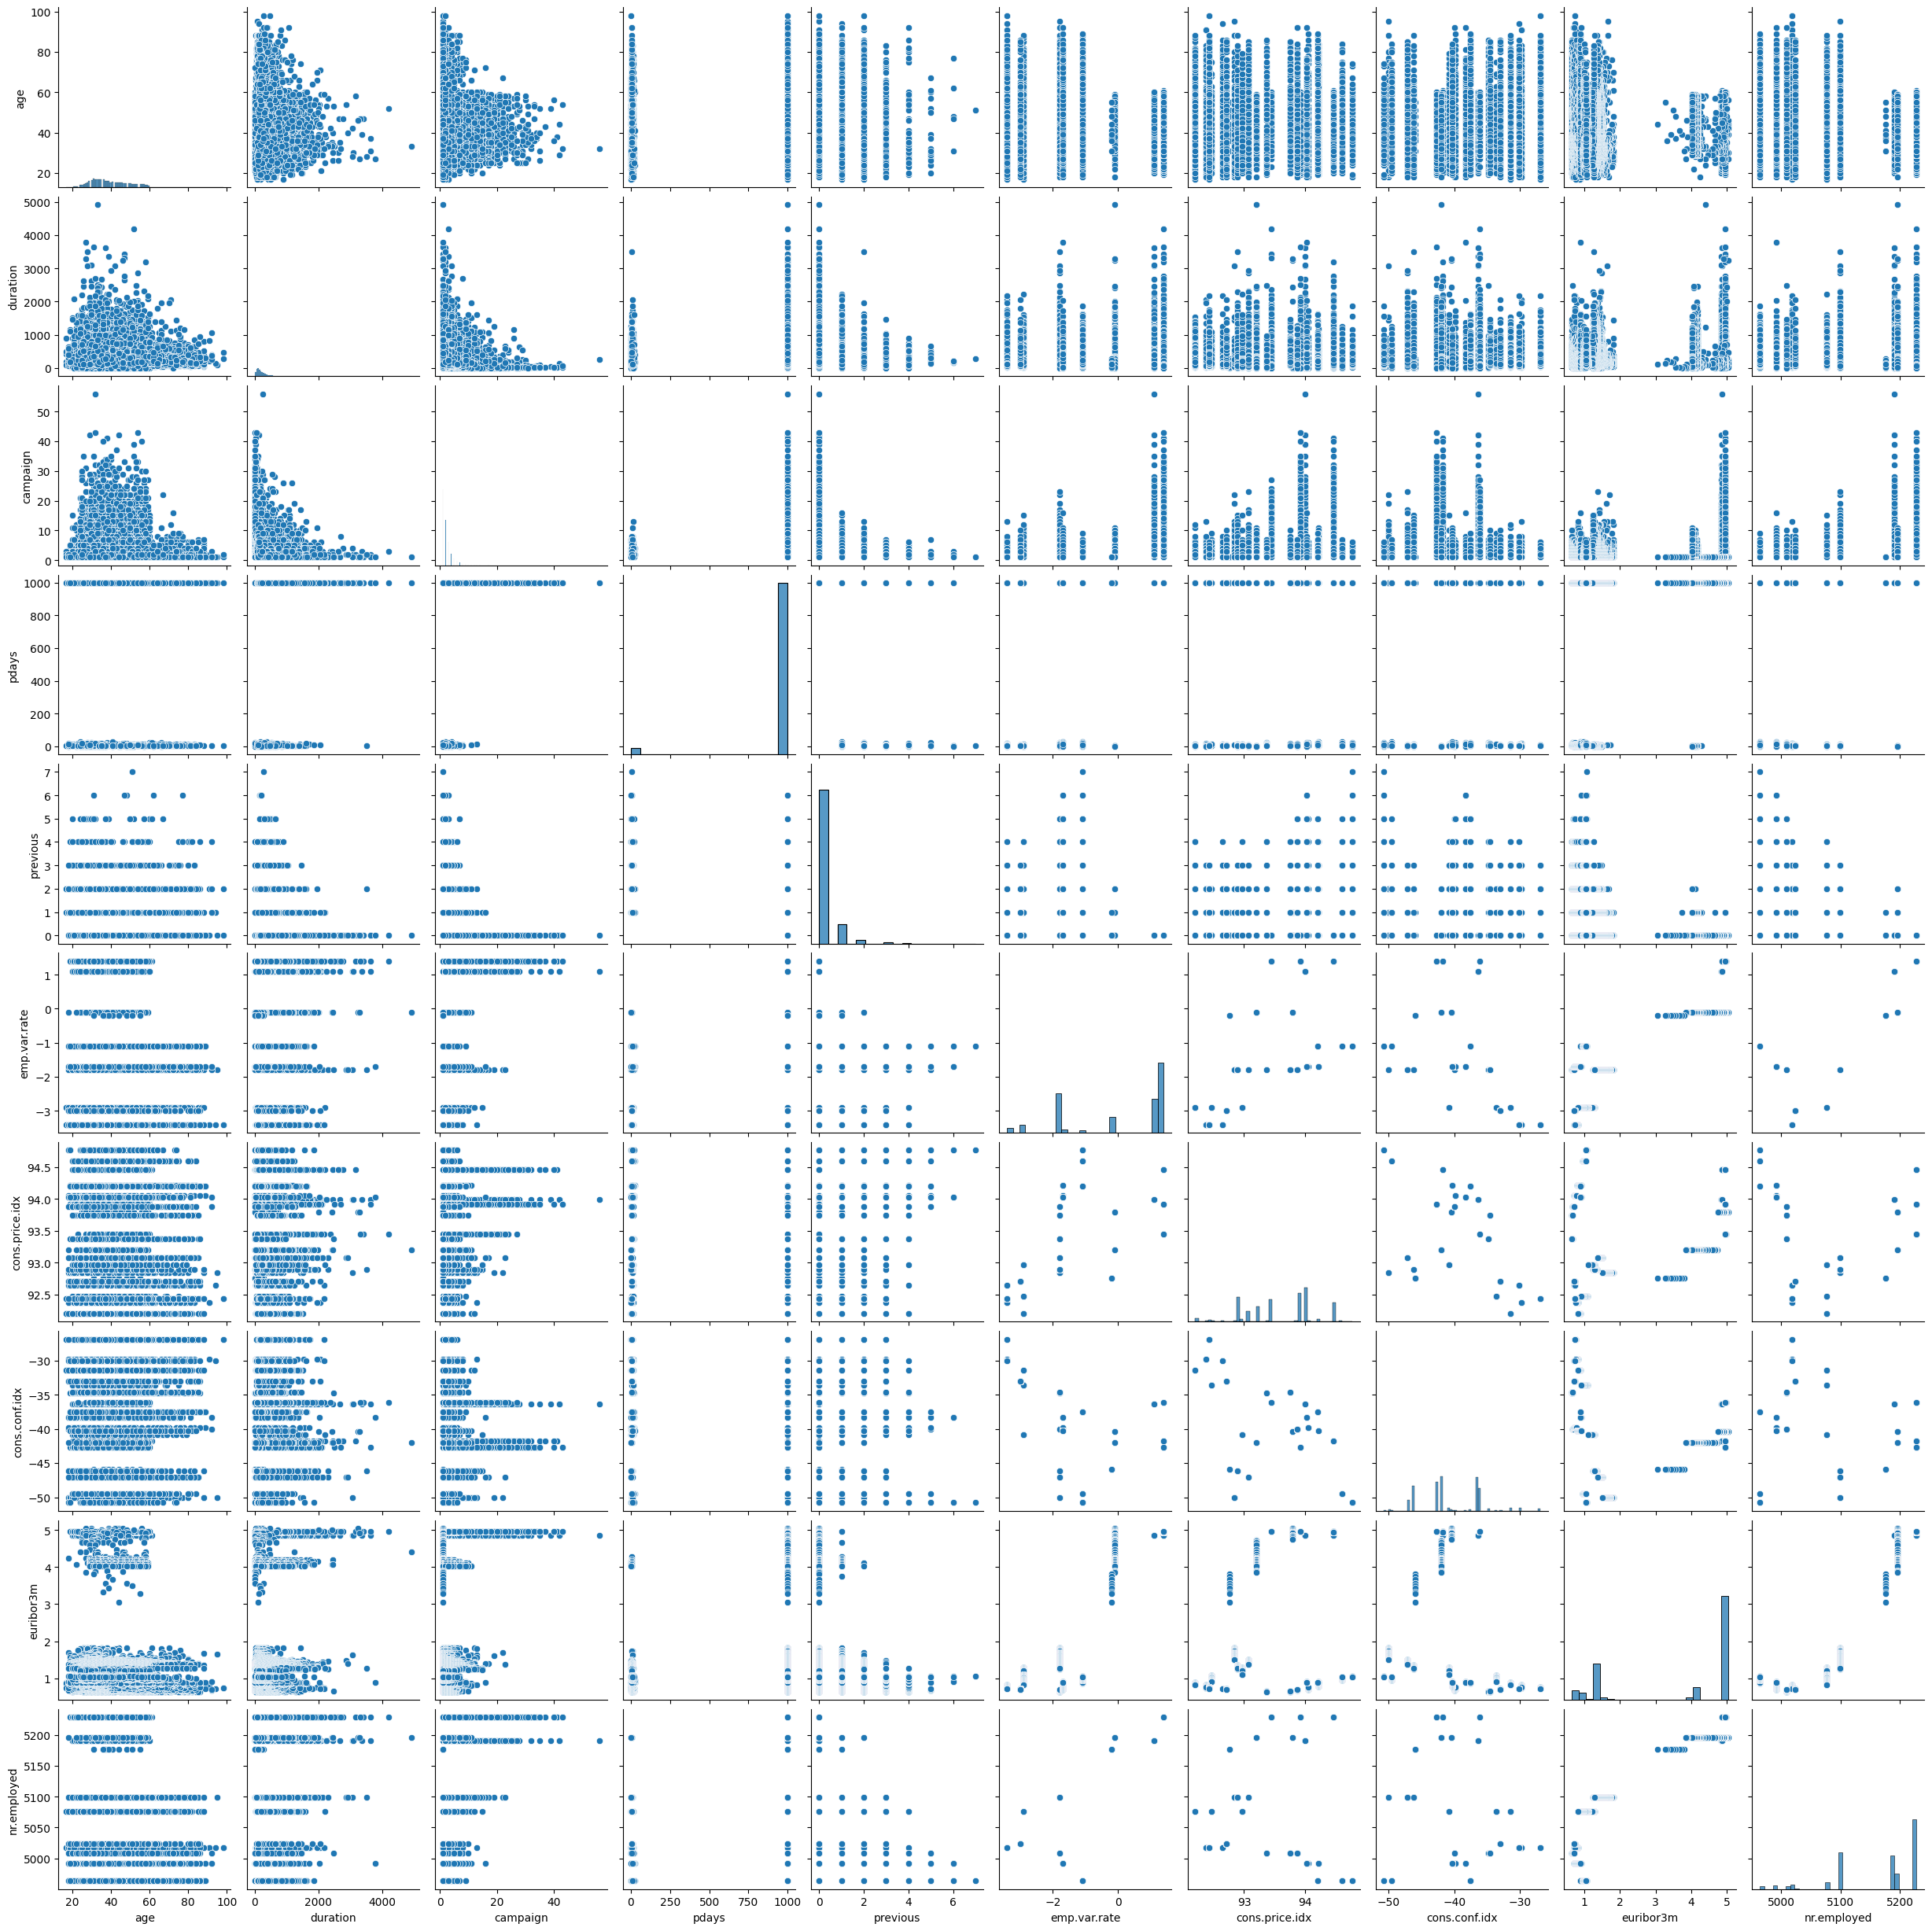

In [20]:
sns.pairplot(df)

In [21]:
X = pd.get_dummies(df)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

In [26]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall ine

In [27]:
model = KMeans(n_clusters=2)

In [28]:
cluster_labels = model.fit_predict(scaled_X)

In [29]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
X['Cluster'] = cluster_labels

In [31]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1


<Axes: >

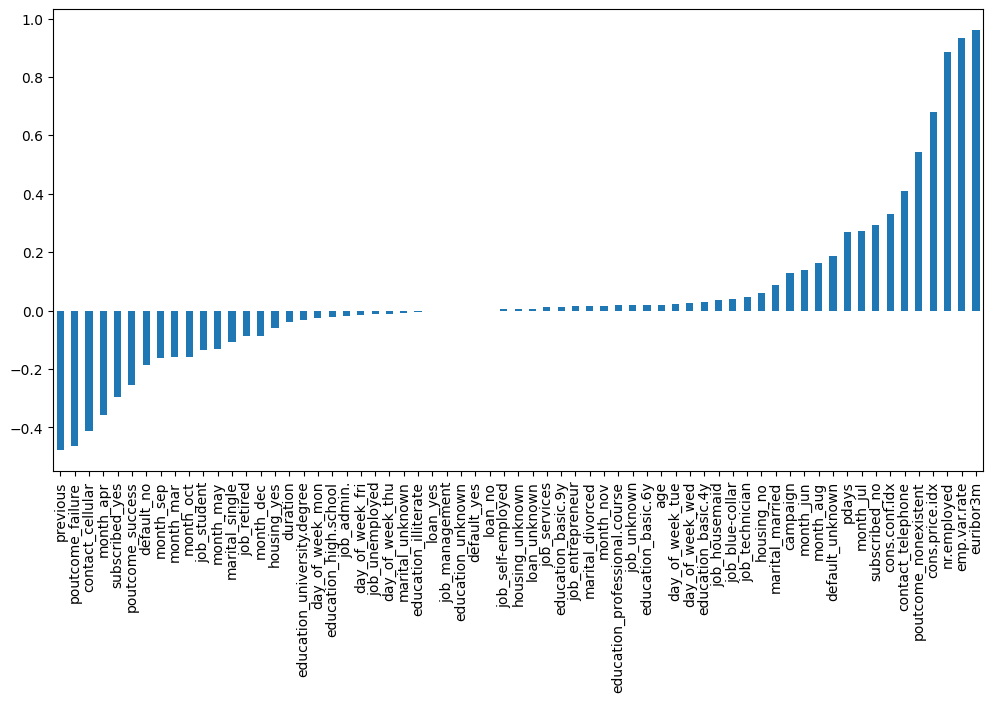

In [32]:
plt.figure(figsize=(12,6))
X.corr(numeric_only=True)['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [72]:
ssd = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_) 

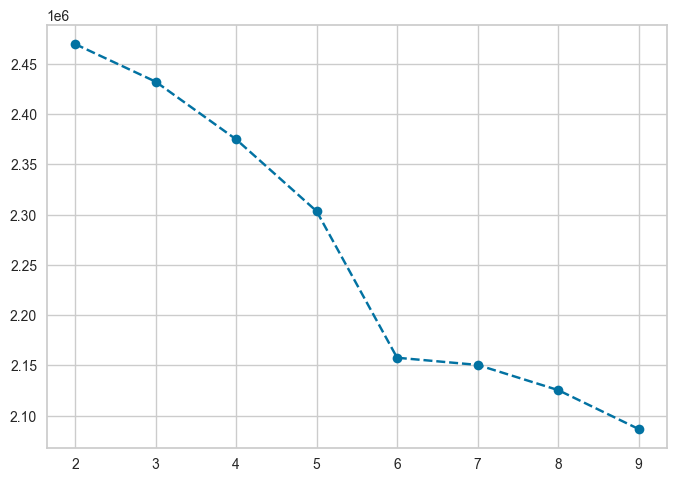

In [73]:
plt.plot(range(2, 10), ssd, 'o--')

In [46]:
ssd

[2469792.457107315,
 2398643.983042385,
 2320310.5751640196,
 2293737.490780396,
 2187243.761476572,
 2104687.3198232036,
 2116756.965438995,
 2030387.395453152]

In [47]:
pd.Series(ssd)

0    2.469792e+06
1    2.398644e+06
2    2.320311e+06
3    2.293737e+06
4    2.187244e+06
5    2.104687e+06
6    2.116757e+06
7    2.030387e+06
dtype: float64

In [48]:
pd.Series(ssd).diff()

0              NaN
1    -71148.474065
2    -78333.407878
3    -26573.084384
4   -106493.729304
5    -82556.441653
6     12069.645616
7    -86369.569986
dtype: float64

In [49]:
pd.DataFrame(data=zip(range(2, 10), pd.Series(ssd).diff()), columns=['K', 'SSD diff'])

,K,SSD diff
0,2,NaN
1,3,-71148.474065
2,4,-78333.407878
3,5,-26573.084384
4,6,-106493.729304
5,7,-82556.441653
6,8,12069.645616
7,9,-86369.569986


In [51]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [52]:
silhouettes = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    silhouettes.append(silhouette_score(scaled_X, model.labels_)) 

In [53]:
sil = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    sil.append(silhouette_score(scaled_X, model.predict(scaled_X))) 

In [54]:
silhouettes

[0.11699454625827195,
 0.04434045829667961,
 0.09932745234443037,
 0.06753517102556249,
 0.0695305201456633,
 0.05380919347279012,
 0.06171570770291551,
 0.07191878262151981]

In [55]:
sil

[0.11699454625827195,
 0.04434337482068473,
 0.05122383955669981,
 0.060157581195635544,
 0.06484851789901167,
 0.05721342456347562,
 0.05199918616577586,
 0.06663198742980476]

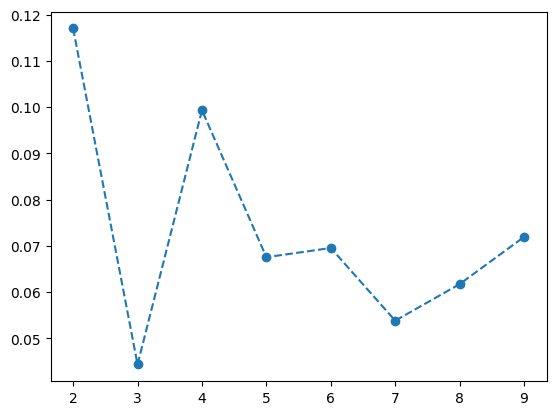

In [57]:
plt.plot(range(2, 10), silhouettes, 'o--')

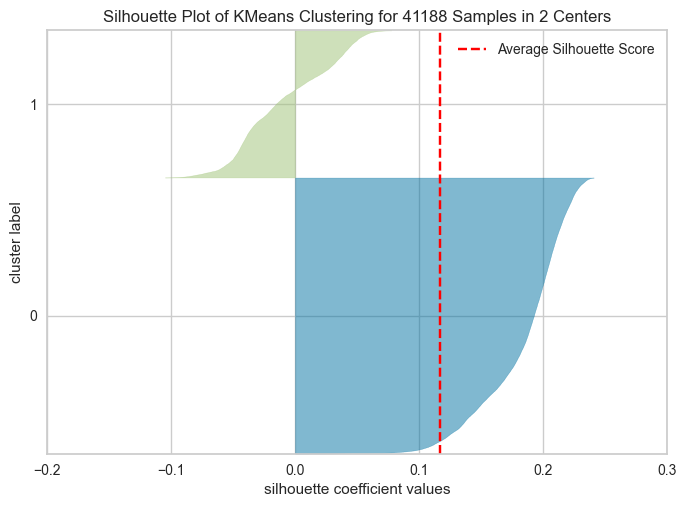

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41188 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=42))

In [66]:
from yellowbrick.cluster import silhouette_visualizer, SilhouetteVisualizer
from yellowbrick.datasets import load_credit

# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(2, random_state=42), scaled_X, colors='yellowbrick')

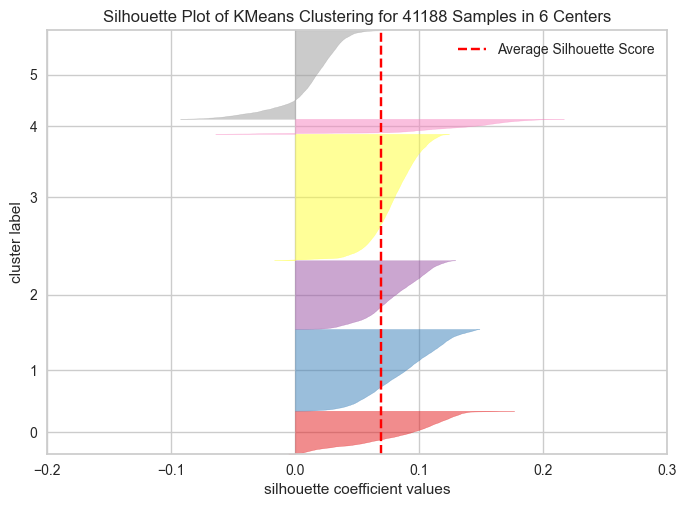

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41188 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
mod = SilhouetteVisualizer(KMeans(6))
mod.fit(scaled_X)
mod.show()

In [75]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1


<Axes: xlabel='duration', ylabel='age'>

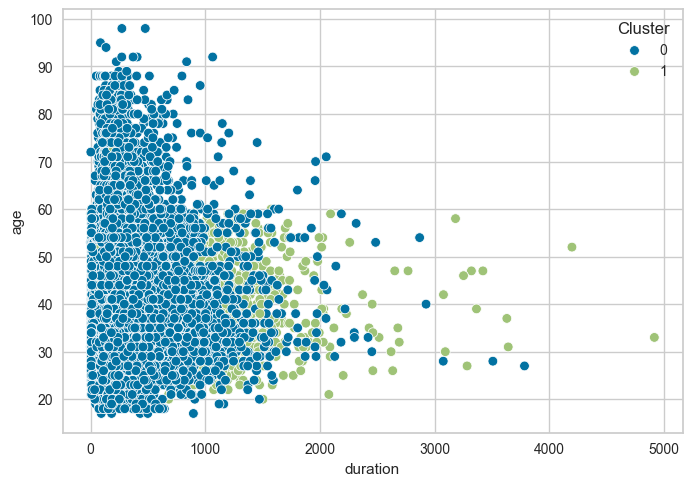

In [79]:
sns.scatterplot(data=X, x='duration', y='age', hue='Cluster')